### Transcription factor binding motifs (MEME).
kilde:; https://www.cell.com/molecular-cell/fulltext/S1097-2765(18)30989-4?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS1097276518309894%3Fshowall%3Dtrue

To do: Investigate CTCF motifs

- What is a CTCF motif?
- Find the correct file to load:
  - Correct file: `data/comp_edges/spermatogonia_100kb_10Mb_edges.csv`
- Look into MEME:
  - Install MEME
  - is tere aditional file needed fx a sequences file?
  - find the missing files 
  - Investigate CTCF motif using MEME


In [1]:
import pandas as pd

### fjernlse ad NA værdier df_eigen.dropna(inplace=True)
featur eller bock ændre på hvor kanterne ligger. lige nu er hver na værdi registreret som en kant. nan skyldes at der ikke har været nok data til pca. søren brugte forward fill til NA værdierne 

In [2]:
import numpy as np

df_eigen = pd.read_csv("/home/johanulstrup/johan_gpn/people/johanulsrup/johan_gpn/data/eigentracks/spermatogonia_e1_100kb_10Mb.csv", sep="\t")


df_eigen["start"] = df_eigen.index * 100000
print(df_eigen.head(30))

#df_eigen.dropna(inplace=True)# featur eller bock ændre på hvor kanterne ligger. lige nu er hver na værdi registreret som en kant. nan skyldes at der ikke har været nok data til pca. søren brugte forward fill til NA værdierne 
#np.diff
sign_change_coords = np.where(np.diff((df_eigen.e1 > 0).astype(int)))[0]
sign_change_coords*100000

          e1    start
0        NaN        0
1        NaN   100000
2        NaN   200000
3        NaN   300000
4        NaN   400000
5        NaN   500000
6        NaN   600000
7        NaN   700000
8        NaN   800000
9   0.686841   900000
10       NaN  1000000
11       NaN  1100000
12       NaN  1200000
13  0.879835  1300000
14  0.868704  1400000
15  0.713170  1500000
16  0.800400  1600000
17  0.831374  1700000
18  0.839612  1800000
19  0.791525  1900000
20  0.727534  2000000
21  0.673111  2100000
22  0.664820  2200000
23       NaN  2300000
24 -0.259239  2400000
25 -0.555641  2500000
26 -0.545779  2600000
27 -0.497842  2700000
28 -0.431893  2800000
29 -0.318080  2900000


array([   800000,    900000,   1200000,   2200000,   9600000,   9900000,
        10000000,  10100000,  10300000,  10400000,  10900000,  11000000,
        12500000,  12900000,  13100000,  13300000,  16400000,  19200000,
        19600000,  19800000,  20700000,  21700000,  21900000,  27000000,
        27100000,  28800000,  29900000,  30000000,  37900000,  40200000,
        40800000,  40900000,  41000000,  41100000,  47000000,  49200000,
        49300000,  50600000,  53000000,  54100000,  67200000,  67600000,
        67700000,  68600000,  68700000,  69700000,  70300000,  70400000,
        70500000,  71200000,  71500000,  72000000,  72100000,  72700000,
        72800000,  73000000,  73100000,  73200000,  73500000,  73600000,
        73900000,  74100000,  74700000,  74800000,  74900000,  75000000,
        75100000,  75300000,  75400000,  75600000,  75900000,  76500000,
        76600000,  77000000,  77100000,  77300000,  77500000,  78400000,
        79000000,  79100000,  79900000,  80800000, 

In [3]:
"Her er kanterne i 200Kbp overgangszoner."
" Alle intervaller er 200kb, så du kan nemt finde den aktuelle boundary"
" ved at tage midtpunktet mellem (start) og (end) på hver interval"

df = pd.read_csv("../data/comp_edges/spermatogonia_100kb_10Mb_edges.csv")

resolution = 100_000
df['edge'] = df['start']+resolution

print(df.head(10))
print(df.shape)

      start       end chrom  resolution      edge
0    800000   1000000  chrX      100000    900000
1   1100000   1400000  chrX      100000   1200000
2   2300000   2500000  chrX      100000   2400000
3   9600000   9800000  chrX      100000   9700000
4   9900000  10600000  chrX      100000  10000000
5  10900000  11200000  chrX      100000  11000000
6  12500000  12700000  chrX      100000  12600000
7  12900000  13500000  chrX      100000  13000000
8  16400000  16600000  chrX      100000  16500000
9  19200000  19400000  chrX      100000  19300000
(86, 5)


2 option eather edit fasta file so it only contains the seq interval of 200kb that sorunds the edges (100kb on each side) or we just run meme and the sort the output later

only x chrm

Geneinfo  ideogram

In [4]:
# import geneinfo.plot as gplt
# #plot geneome for baboon
# g = gplt.GenomeIdeogram(assembly='papHam1') 
# g.draw_chromosomes()

In [5]:
# ## plot geneome for macaque
# g = gplt.GenomeIdeogram(assembly='rheMac10')
# g.draw_chromosomes()

In [6]:
# ## only plot chromosome X
# x = gplt.ChromIdeogram('chrX', assembly='papHam1')
# x.draw_chromosomes()

# x2 = gplt.ChromIdeogram('chrX', assembly='rheMac10')
# x2.draw_chromosomes()


Genomic segment annotation
segnemt default minimum is 200kb  

In [7]:
# segment, but not stupid

import numpy as np

edges = df['edge'].to_numpy()
chrom = df['chrom'].iloc[0]  # assumes all rows have the same chromosome

segments_with_alpha = [
    ('chrX', int(edges[i]+1), int(edges[i+1]), i % 2)
    for i in range(len(edges) - 1)
]

# Example output (first 3 elements)
print(segments_with_alpha[:5])

[('chrX', 900001, 1200000, 0), ('chrX', 1200001, 2400000, 1), ('chrX', 2400001, 9700000, 0), ('chrX', 9700001, 10000000, 1), ('chrX', 10000001, 11000000, 0)]


In [8]:
min_size = 200_000

all_ok = all(
    (end - start) >= min_size
    for _, start, end, _ in segments_with_alpha
)

print(" All segments >= 200,000:", all_ok)

 All segments >= 200,000: True


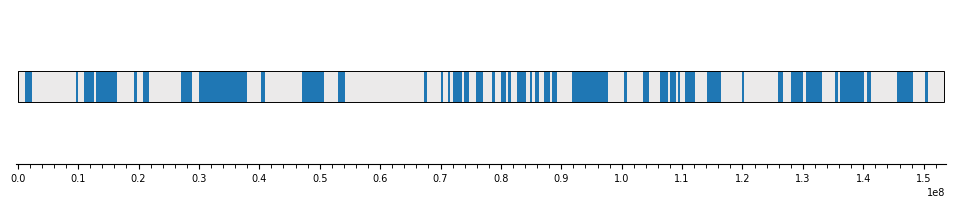

In [9]:
import matplotlib.pyplot as plt

import geneinfo.plot as gplt
x = gplt.ChromIdeogram('chrX', assembly='rheMac10')
x.draw_chromosomes()
x.add_segments(segments_with_alpha, facecolor='tab:blue')
plt.show()

plot show a and b compartment 
what is what?
macaque

remapping:
recombination rate wiinduer 
genere
metylering 
repeats 
GC kontent 
ctfc content 


søren har lave a og b kort: hvordan relatere de sig til hinanden?
- sæt sig godt in i de kort
- hvoedan er de lavet? og hvilket bias?
- de er korigeret kort forskellige

remove git-lfs

recombination rate wiinduer 
ucmbic download recombinations kort forhpåbenligt i 100 kb intervaller https://genome.ucsc.edu/cgi-bin/hgTables

## Repeats remapping
- download from UCSC: https://hgdownload.soe.ucsc.edu/goldenPath/rheMac10/database/

## note: here i have not taken into account which compartment the repeat is in only that it is before of after the edged, give that we chang form a to be at an edges then in alternate between bing a and b befor the edges 

In [10]:
#INPORT repeats 
#header found here= https://genome.ucsc.edu/cgi-bin/hgTables?db=hg38&hgta_group=rep&hgta_track=nestedRepeats&hgta_table=nestedRepeats&hgta_doSchema=describe+table+schema
columns = [
    "bin", "chrom", "chromStart", "chromEnd", "name", "score", "strand",
    "thickStart", "thickEnd", "reserved", "blockCount", "blockSizes",
    "chromStarts", "strandRep", "repLeft", "repClass", "repFamily"
]

repeats = pd.read_csv("/home/johanulstrup/johan_gpn/people/johanulsrup/johan_gpn/data/nestedRepeats.txt", sep='\t', header=None, names=columns)

# View first few rows
print(repeats.head())

   bin chrom  chromStart  chromEnd     name  score strand  thickStart  \
0  585  chr1        3116      3467  AluYRa1    856      +        3116   
1  585  chr1        3926      7211    L1PA7    748      +        3926   
2  585  chr1       13937     14502  L1ME3Cz    184      +       13937   
3  585  chr1       17217     20642    L1MB2    319      +       17217   
4  585  chr1       18677     19608    AluJb    606      -       18677   

   thickEnd  reserved  blockCount          blockSizes            chromStarts  \
0      3467         0           2             301,19,                 0,332,   
1      7211         0           2          1116,1857,                0,1428,   
2     14502         0           2            329,136,                 0,429,   
3     20642         0           5  113,564,72,45,452,  0,469,1337,2635,2973,   
4     19608         0           2             77,238,                 0,693,   

    strandRep  repLeft repClass repFamily  
0        +,+,        3     SINE     

In [11]:
from genominterv.remapping import remap
from genominterv.remapping import interval_distance, genomic
from genominterv.remapping import remap_interval_data

import genominterv
import seaborn as sns

# Prepare dataframes for distance calculation
df_comp = df[['chrom', 'start', 'end']].copy()
df_rep = repeats[repeats['chrom'] == 'chrX'][['chrom', 'chromStart', 'chromEnd']].rename(
    columns={'chromStart': 'start', 'chromEnd': 'end'}
)

#remove repeats that are not nere the a and b transition zones
min_start = df_comp['start'].min()
max_end = df_comp['end'].max()

df_rep_filtered = df_rep[(df_rep['start'] <= max_end) & (df_rep['end'] >= min_start)]
print(df_rep_filtered.head())

# Calculate distances between compartments and repeats
results = remap_interval_data(df_rep_filtered,df_comp,relative=True)
results["mid"]=(results["start"] + results["end"] ) / 2
results["absmid"] = results["mid"].abs()


print(df_comp.head())
print(df_rep.head())
print(results.head())

#testing results
print(results["start"].unique())
print("is na:",results["start"].isna().sum())
print("not na:",results["start"].notna().sum())

#uniform fordeling af data til at plotte op imod
n = 1000
a = np.sort(np.random.randint(1, 10_000_000, size=n))
annot = pd.DataFrame(dict(chrom='chrX', start=a, end=a+10))
q = np.sort(np.random.randint(1, 10_000_000, size=n))
query = pd.DataFrame(dict(chrom='chrX', start=q, end=q+10))
df1 = remap_interval_data(query, annot, relative=True)
df1['mid'] = (df1.start + df1.end) / 2
df1['absmid'] = df1.mid.abs()






       chrom   start     end
525243  chrX  805308  805520
525244  chrX  823469  823608
525245  chrX  826230  826721
525246  chrX  832268  833492
525247  chrX  842705  842917
  chrom    start       end
0  chrX   800000   1000000
1  chrX  1100000   1400000
2  chrX  2300000   2500000
3  chrX  9600000   9800000
4  chrX  9900000  10600000
       chrom  start    end
525131  chrX   2386   3360
525132  chrX  17185  17670
525133  chrX  22442  23286
525134  chrX  50036  50706
525135  chrX  60297  62034
   start  end chrom  start_orig  end_orig  mid  absmid
0    NaN  NaN  chrX      805308    805520  NaN     NaN
1    NaN  NaN  chrX      805308    805520  NaN     NaN
2    NaN  NaN  chrX      823469    823608  NaN     NaN
3    NaN  NaN  chrX      823469    823608  NaN     NaN
4    NaN  NaN  chrX      826230    826721  NaN     NaN
[        nan  0.03619     0.07586    ... -0.00734917 -0.0080025
 -0.0085375 ]
is na: 10310
not na: 27287


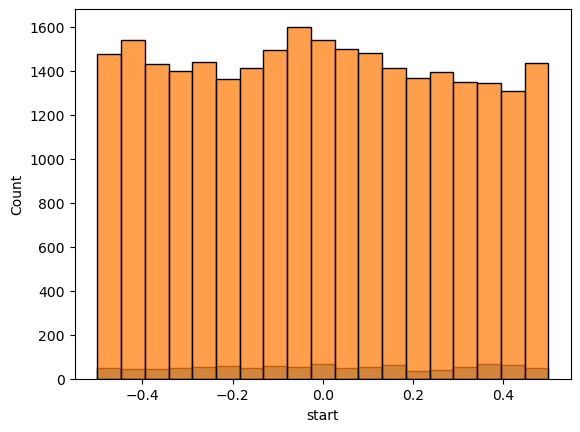

In [12]:
#| label: nested-repeat-eigentrack-start
import seaborn as sns
import numpy as np
sns.histplot(df1, x='start', bins=np.linspace(-0.5, 0.5, 20))
sns.histplot(results, x='start', bins=np.linspace(-0.5, 0.5, 20))
plt.show()

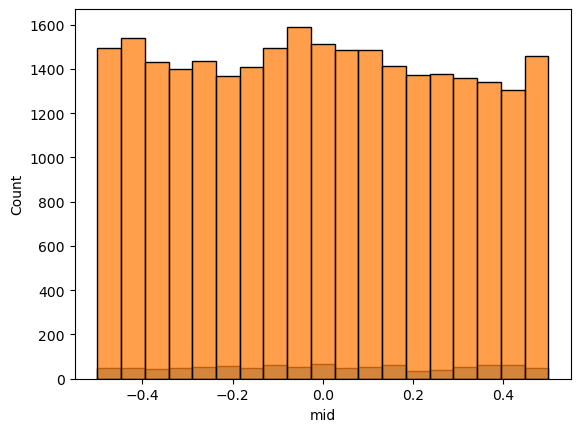

In [13]:
#| label: nested-repeat-eigentrack-mid
sns.histplot(df1, x='mid', bins=np.linspace(-0.5, 0.5, 20))
sns.histplot(results, x='mid', bins=np.linspace(-0.5, 0.5, 20))
plt.show()

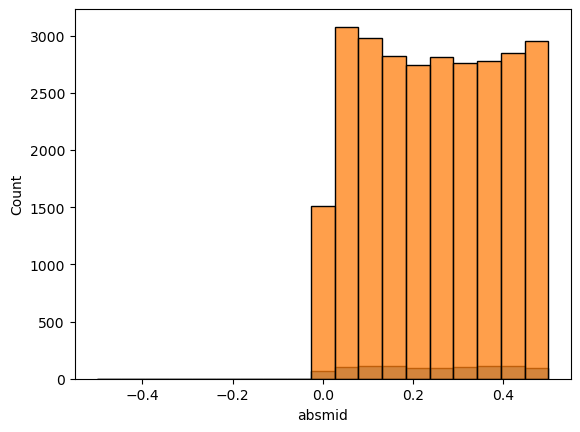

In [14]:
#| label: nested-repeat-eigentrack-absmid
sns.histplot(df1, x='absmid', bins=np.linspace(-0.5, 0.5, 20))
sns.histplot(results, x='absmid', bins=np.linspace(-0.5, 0.5, 20))
plt.show()

## Eigen tracks
function to extract the eigen tracks from the file

In [15]:
def parse_compartment_data(file_name):
    e1_100kb = pd.read_csv(file_name)
    e1_100kb['start'] = [i*100_000 for i in range(e1_100kb.index.size)]
    e1_100kb['end'] = e1_100kb.start + 100_000
    e1_100kb['sign'] = np.sign(e1_100kb.e1)
    e1_100kb['segment_id'] = ((e1_100kb.sign.shift() != e1_100kb.sign)).cumsum()
    
    comp = e1_100kb.groupby('segment_id', as_index=False).agg(dict(
         e1=['mean', 'sum'], 
         start='min', 
         end='max', 
         segment_id='mean', 
         sign='mean'
    ))
    comp.columns = ['_'.join(col).strip() for col in comp.columns.values]
    comp = comp.rename(
        columns={'start_min':'start',
                 'end_max':'end', 
                 'segment_id_mean':'segment_id', 
                 'sign_mean':'sign'}
    )
    comp['comp'] = ['A' if x > 0 else 'B' for x in comp.sign]
    comp = comp.reset_index()
    comp['chrom'] = 'chrX'
    
    _comp = comp.copy()
    for i in range(1, _comp.index.size-1):
        if np.isnan(_comp.loc[i-1, 'e1_mean']):
            _comp.loc[i, 'start'] = np.nan
        if np.isnan(_comp.loc[i+1, 'e1_mean']):
            _comp.loc[i, 'end'] = np.nan
    _comp = _comp.loc[~_comp.e1_mean.isnull(), :]
    _comp = _comp.reset_index()
    compartment_edges = pd.concat([_comp.start, _comp.end]).sort_values().unique()
    
    compartments = comp.loc[~comp.e1_mean.isnull()].copy()
    compartments['start'] = compartments.start.astype(int)
    compartments['end'] = compartments.end.astype(int)

    return compartments, compartment_edges



In [16]:
def edge_segments(compartment_edges, flank):
    compartment_edge_segm = pd.DataFrame(np.column_stack((compartment_edges, compartment_edges+flank)), columns=['start', 'end'])
    compartment_edge_segm['chrom'] = 'chrX'
    return compartment_edge_segm




In [17]:
edges_comps, eigen_edges = parse_compartment_data("/home/johanulstrup/johan_gpn/people/johanulsrup/johan_gpn/data/eigentracks/spermatogonia_e1_100kb_10Mb.csv")

#edges_comps
print(eigen_edges.shape)
eigen_edges


(119,)


array([9.700e+06, 1.000e+07, 1.010e+07, 1.020e+07, 1.040e+07, 1.050e+07,
       1.100e+07, 1.110e+07, 1.260e+07, 1.300e+07, 1.320e+07, 1.340e+07,
       1.650e+07, 1.930e+07, 1.970e+07, 1.990e+07, 2.080e+07, 2.180e+07,
       2.200e+07, 2.710e+07, 2.720e+07, 2.890e+07, 3.000e+07, 3.010e+07,
       3.800e+07, 4.030e+07, 4.090e+07, 4.100e+07, 4.110e+07, 4.120e+07,
       4.710e+07, 5.070e+07, 5.310e+07, 5.420e+07, 6.730e+07, 6.770e+07,
       6.780e+07, 7.130e+07, 7.160e+07, 7.210e+07, 7.220e+07, 7.420e+07,
       7.480e+07, 7.710e+07, 7.720e+07, 7.740e+07, 7.760e+07, 7.850e+07,
       7.920e+07, 8.000e+07, 8.090e+07, 8.120e+07, 8.170e+07, 8.190e+07,
       8.210e+07, 8.220e+07, 8.270e+07, 8.290e+07, 8.420e+07, 8.440e+07,
       8.490e+07, 8.520e+07, 8.560e+07, 8.570e+07, 8.580e+07, 8.630e+07,
       8.640e+07, 8.720e+07, 8.730e+07, 8.750e+07, 8.770e+07, 8.810e+07,
       8.840e+07, 8.930e+07, 9.770e+07, 1.004e+08, 1.009e+08, 1.010e+08,
       1.035e+08, 1.046e+08, 1.064e+08, 1.076e+08, 

In [18]:
edges_comps

,index,e1_mean,e1_sum,start,end,segment_id,sign,comp,chrom
9,9,0.686841,0.686841,900000,1000000,10.0,1.0,A,chrX
13,13,0.779009,7.790087,1300000,2300000,14.0,1.0,A,chrX
15,15,-0.410198,-29.944471,2400000,9700000,16.0,-1.0,B,chrX
16,16,0.044230,0.132690,9700000,10000000,17.0,1.0,A,chrX
17,17,-0.283227,-0.283227,10000000,10100000,18.0,-1.0,B,chrX
...,...,...,...,...,...,...,...,...,...
295,295,0.408386,2.450317,150700000,151300000,296.0,1.0,A,chrX
298,298,0.810029,0.810029,151500000,151600000,299.0,1.0,A,chrX
300,300,1.114724,2.229447,151700000,151900000,301.0,1.0,A,chrX
307,307,-0.826508,-2.479525,152500000,152800000,308.0,-1.0,B,chrX


In [19]:
## kan bruges til at sætte interval rundt om kanten fx(1,10,100000)
eigen_interval = edge_segments(eigen_edges, 1)
eigen_interval

,start,end,chrom
0,9700000.0,9700001.0,chrX
1,10000000.0,10000001.0,chrX
2,10100000.0,10100001.0,chrX
3,10200000.0,10200001.0,chrX
4,10400000.0,10400001.0,chrX
...,...,...,...
114,145600000.0,145600001.0,chrX
115,148300000.0,148300001.0,chrX
116,148500000.0,148500001.0,chrX
117,150700000.0,150700001.0,chrX


# remapping with eigen tracks

In [20]:
df_comp = eigen_interval[['chrom', 'start', 'end']].copy()
df_rep = repeats[repeats['chrom'] == 'chrX'][['chrom', 'chromStart', 'chromEnd']].rename(
    columns={'chromStart': 'start', 'chromEnd': 'end'}
)
print(df_comp.head())
print(df_rep.head())

# Calculate distances between compartments and repeats
resultsv4 = remap_interval_data(df_rep_filtered,df_comp,relative=True)
resultsv4["mid"]=(resultsv4["start"] + resultsv4["end"] ) / 2
resultsv4["absmid"] = resultsv4["mid"].abs()

# Replace -0.0 and 0.0 with np.nan in 'start'
resultsv4['start'] = resultsv4['start'].replace(-0.0, np.nan)
resultsv4['start'] = resultsv4['start'].replace(0.0, np.nan)
resultsv4['end'] = resultsv4['end'].replace(-0.0, np.nan)
resultsv4['end'] = resultsv4['end'].replace(0.0, np.nan)
resultsv4['mid'] = resultsv4['mid'].replace(-0.0, np.nan)
resultsv4['mid'] = resultsv4['mid'].replace(0.0, np.nan)
resultsv4['absmid'] = resultsv4['absmid'].replace(-0.0, np.nan)
resultsv4['absmid'] = resultsv4['absmid'].replace(0.0, np.nan)

print(resultsv4.head())
print(resultsv4["start"].unique())

  chrom       start         end
0  chrX   9700000.0   9700001.0
1  chrX  10000000.0  10000001.0
2  chrX  10100000.0  10100001.0
3  chrX  10200000.0  10200001.0
4  chrX  10400000.0  10400001.0
       chrom  start    end
525131  chrX   2386   3360
525132  chrX  17185  17670
525133  chrX  22442  23286
525134  chrX  50036  50706
525135  chrX  60297  62034
   start  end chrom  start_orig  end_orig  mid  absmid
0    NaN  NaN  chrX      805308    805520  NaN     NaN
1    NaN  NaN  chrX      823469    823608  NaN     NaN
2    NaN  NaN  chrX      826230    826721  NaN     NaN
3    NaN  NaN  chrX      832268    833492  NaN     NaN
4    NaN  NaN  chrX      842705    842917  NaN     NaN
[        nan  0.02188007  0.03717012 ... -0.02795514 -0.01016005
 -0.00686503]


In [21]:
#uniform fordeling af data til at plotte op imod
n = 1000
a = np.sort(np.random.randint(1, 10_000_000, size=n))
annot = pd.DataFrame(dict(chrom='chrX', start=a, end=a+10))
q = np.sort(np.random.randint(1, 10_000_000, size=n))
query = pd.DataFrame(dict(chrom='chrX', start=q, end=q+10))
dfv3 = remap_interval_data(query, annot, relative=True)
dfv3['mid'] = (df1.start + df1.end) / 2
dfv3['absmid'] = df1.mid.abs()


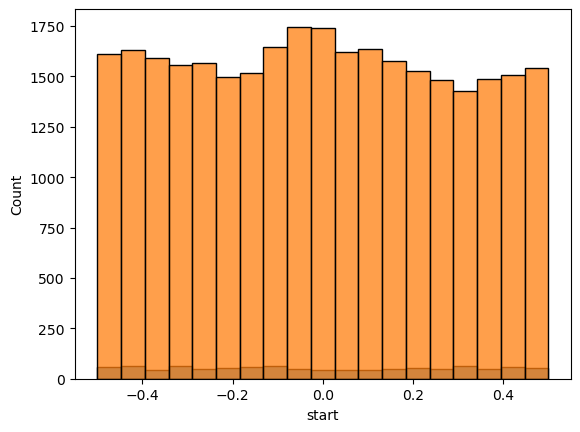

In [22]:
#| label: nested-repeat-edge-1bp-start
sns.histplot(dfv3, x='start', bins=np.linspace(-0.5, 0.5, 20))
sns.histplot(resultsv4, x='start', bins=np.linspace(-0.5, 0.5, 20))
plt.show()

i think that 0.0 is wroung because the values that previus where NA is know 0.0

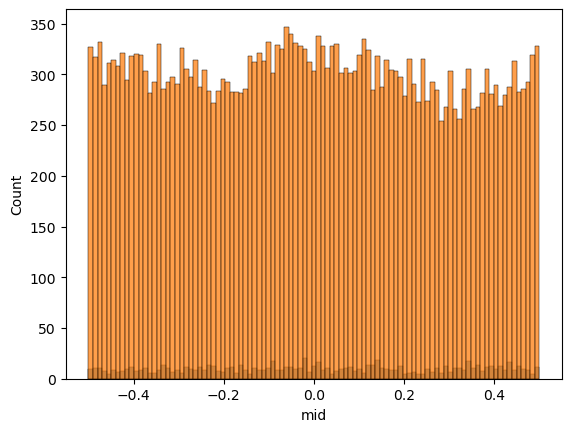

In [23]:
#| label: nested-repeat-edge-1bp-mid
sns.histplot(dfv3, x='mid', bins=np.linspace(-0.5, 0.5, 100))
sns.histplot(resultsv4, x='mid', bins=np.linspace(-0.5, 0.5, 100))
plt.show()

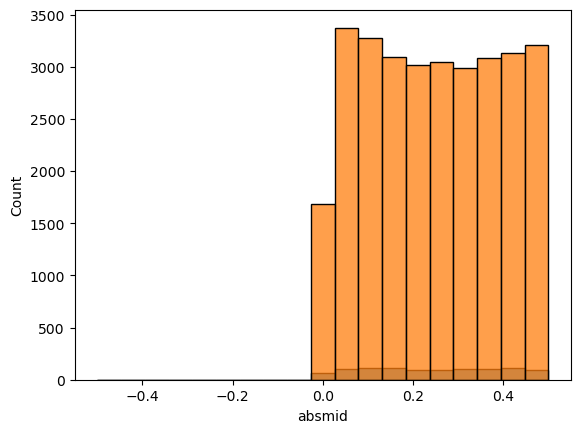

In [24]:
#| label: nested-repeat-edge-1bp-absmid
sns.histplot(dfv3, x='absmid', bins=np.linspace(-0.5, 0.5, 20))
sns.histplot(resultsv4, x='absmid', bins=np.linspace(-0.5, 0.5, 20))
plt.show()

### simple repeats remapping

In [25]:
simple_repeats =pd.read_csv("../data/simpleRepeat.txt", sep='\t', header=None, names=columns)
simple_repeats = simple_repeats[simple_repeats['chrom'] == 'chrX']
simple_repeats

,bin,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,blockSizes,chromStarts,strandRep,repLeft,repClass,repFamily
935331,585,chrX,1329,1368,trf,20,1.9,20,89,5,60,79,0,15,5,0.90,AAAAAAAAGAAAAGAAAATT
935332,585,chrX,4721,4765,trf,16,2.8,16,78,0,52,22,54,2,20,1.56,TCATCCACCCACCCAT
935333,585,chrX,4722,5839,trf,354,3.1,361,87,4,1532,23,43,2,30,1.66,CATCCACCCACCCATCCACCCACTCACCCATCCATCCACCCACTCA...
935334,585,chrX,4767,4806,trf,20,2.0,20,89,0,60,23,38,2,35,1.68,ACCCATCTATCCATCTATCT
935335,585,chrX,4783,4826,trf,16,2.7,16,92,0,68,25,41,0,32,1.56,ATCTATCCATCTATCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989153,1754,chrX,153293755,153310994,trf,343,50.3,342,73,8,5762,30,17,21,30,1.96,GAAAGAAGCTTTCTGAGAAACTTCTTTGTGATCTGTGAATTCATCT...
989154,219,chrX,153311012,153388913,trf,343,227.9,335,81,7,38207,30,21,17,30,1.96,TGTAACTCAGTGAGTGGAAGTCACAGATCACAAAGCAGTTTCTCAG...
989155,219,chrX,153311012,153388880,trf,171,454.5,171,70,11,39213,30,21,17,30,1.96,TGTAACTCTGTGAGATGAATTCACAGATCACAAAGCAGTTTCTCAG...
989156,219,chrX,153311734,153388924,trf,514,150.5,512,72,11,24543,30,21,17,30,1.96,AGTTTCTCAGAAAGCTTCCTTCCAGTTTTTATCTGAGAATATTTTC...


In [26]:
simple_repeats['name'].unique()

array(['trf'], dtype=object)

In [27]:
print(simple_repeats.columns)

Index(['bin', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand',
       'thickStart', 'thickEnd', 'reserved', 'blockCount', 'blockSizes',
       'chromStarts', 'strandRep', 'repLeft', 'repClass', 'repFamily'],
      dtype='object')


In [28]:
df_simple_repeats = simple_repeats[['chrom', 'chromStart', 'chromEnd']].rename(
    columns={'chromStart': 'start', 'chromEnd': 'end'}
)


print(df_comp.head())
print(df_simple_repeats.head())

# Calculate distances between compartments and repeats
results_simple_repeat = remap_interval_data( df_simple_repeats,df_comp, relative=True)
results_simple_repeat["mid"]=(results_simple_repeat["start"] + results_simple_repeat["end"] ) / 2
results_simple_repeat["absmid"] = results_simple_repeat["mid"].abs()
# Replace -0.0 and 0.0 with np.nan in 'start'
results_simple_repeat['start'] = results_simple_repeat['start'].replace(-0.0, np.nan)
results_simple_repeat['start'] = results_simple_repeat['start'].replace(0.0, np.nan)
results_simple_repeat['end'] = results_simple_repeat['end'].replace(-0.0, np.nan)
results_simple_repeat['end'] = results_simple_repeat['end'].replace(0.0, np.nan)
results_simple_repeat['mid'] = results_simple_repeat['mid'].replace(-0.0, np.nan)
results_simple_repeat['mid'] = results_simple_repeat['mid'].replace(0.0, np.nan)
results_simple_repeat['absmid'] = results_simple_repeat['absmid'].replace(-0.0, np.nan)
results_simple_repeat['absmid'] = results_simple_repeat['absmid'].replace(0.0, np.nan)

print(results_simple_repeat.head())
print(results_simple_repeat["start"].unique())

  chrom       start         end
0  chrX   9700000.0   9700001.0
1  chrX  10000000.0  10000001.0
2  chrX  10100000.0  10100001.0
3  chrX  10200000.0  10200001.0
4  chrX  10400000.0  10400001.0
       chrom  start   end
935331  chrX   1329  1368
935332  chrX   4721  4765
935333  chrX   4722  5839
935334  chrX   4767  4806
935335  chrX   4783  4826
   start  end chrom  start_orig  end_orig  mid  absmid
0    NaN  NaN  chrX        1329      1368  NaN     NaN
1    NaN  NaN  chrX        4721      4765  NaN     NaN
2    NaN  NaN  chrX        4722      5839  NaN     NaN
3    NaN  NaN  chrX        4767      4806  NaN     NaN
4    NaN  NaN  chrX        4783      4826  NaN     NaN
[        nan  0.02462675  0.02472342 ... -0.09899549 -0.0398402
 -0.03801019]


In [29]:
#uniform fordeling af data til at plotte op imod
n = 1000
a = np.sort(np.random.randint(1, 10_000_000, size=n))
annot = pd.DataFrame(dict(chrom='chrX', start=a, end=a+10))
q = np.sort(np.random.randint(1, 10_000_000, size=n))
query = pd.DataFrame(dict(chrom='chrX', start=q, end=q+10))
dfv3 = remap_interval_data(query, annot, relative=True)
dfv3['mid'] = (df1.start + df1.end) / 2
dfv3['absmid'] = df1.mid.abs()



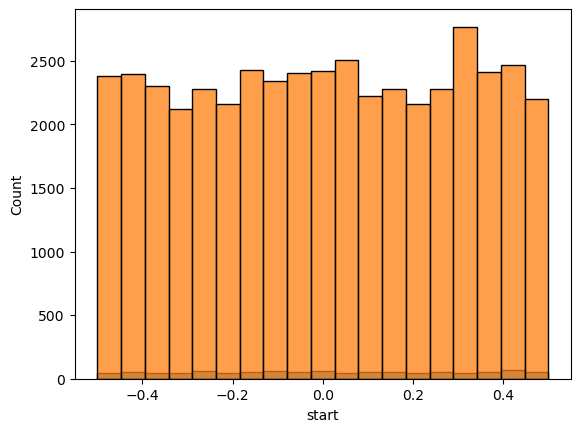

In [30]:
#| label: simple-repeat-edge-1bp-start
sns.histplot(dfv3, x='start', bins=np.linspace(-0.5, 0.5, 20))
sns.histplot(results_simple_repeat, x='start', bins=np.linspace(-0.5, 0.5, 20))
plt.show()

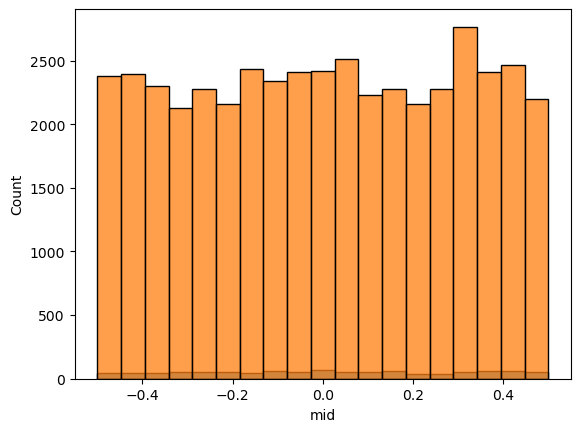

In [31]:
    #| label: simple-repeat-edge-1bp-mid
sns.histplot(dfv3, x='mid', bins=np.linspace(-0.5, 0.5, 20))
sns.histplot(results_simple_repeat, x='mid', bins=np.linspace(-0.5, 0.5, 20))
plt.show()

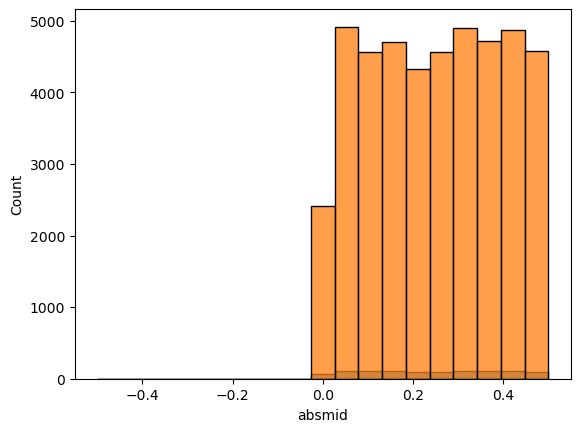

In [32]:
#| label: simple-repeat-edge-1bp-absmid
sns.histplot(dfv3, x='absmid', bins=np.linspace(-0.5, 0.5, 20))
sns.histplot(results_simple_repeat, x='absmid', bins=np.linspace(-0.5, 0.5, 20))
plt.show()

### line plot

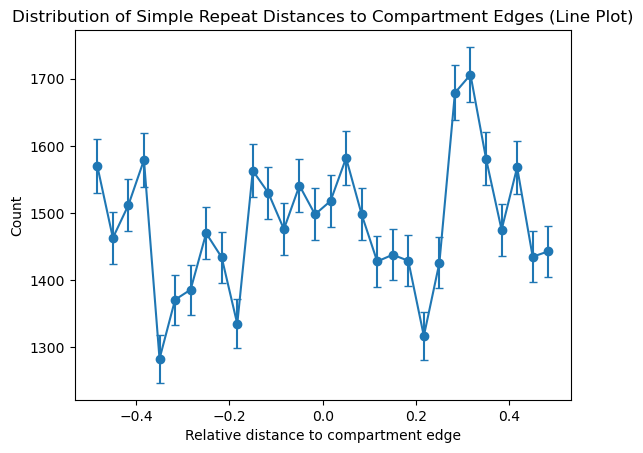

In [33]:
# Use plt.errorbar to plot line with error bars (standard error, Poisson)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate the histogram data for 'start'
counts, bin_edges = np.histogram(results_simple_repeat['start'].dropna(), bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate error bars (standard error of counts, assuming Poisson statistics)
errors = np.sqrt(counts)

# Plot as a line plot with error bars
plt.errorbar(bin_centers, counts, yerr=errors, marker='o', linestyle='-', capsize=3)
plt.xlabel('Relative distance to compartment edge')
plt.ylabel('Count')
plt.title('Distribution of Simple Repeat Distances to Compartment Edges (Line Plot)')
plt.show()


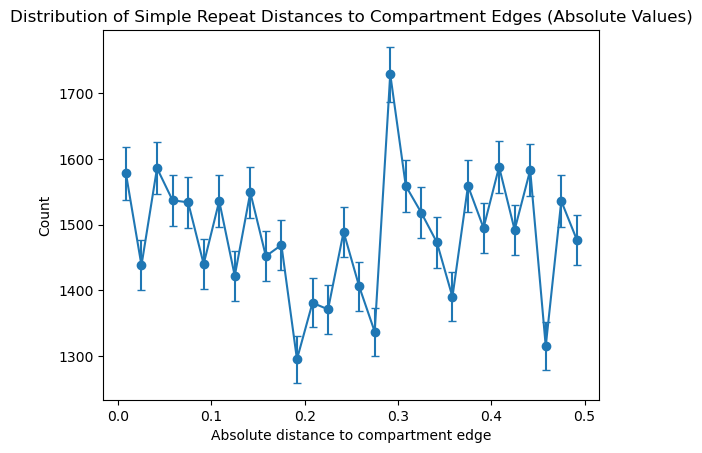

In [34]:
## usig abselut values from the start 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop NaNs and take absolute values
abs_start = results_simple_repeat['start'].dropna().abs()

# Calculate histogram data from absolute values
counts, bin_edges = np.histogram(abs_start, bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate error bars (assuming Poisson distribution)
errors = np.sqrt(counts)

# Plot
plt.errorbar(bin_centers, counts, yerr=errors, marker='o', linestyle='-', capsize=3)
plt.xlabel('Absolute distance to compartment edge')
plt.ylabel('Count')
plt.title('Distribution of Simple Repeat Distances to Compartment Edges (Absolute Values)')
plt.show()



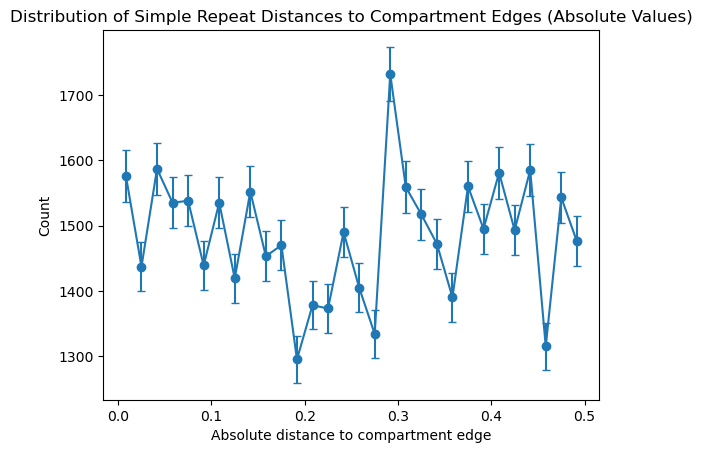

In [35]:
## usig abselut values from the mid
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop NaNs and take absolute values
abs_start = results_simple_repeat['mid'].dropna().abs()

# Calculate histogram data from absolute values
counts, bin_edges = np.histogram(abs_start, bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate error bars (assuming Poisson distribution)
errors = np.sqrt(counts)

# Plot
plt.errorbar(bin_centers, counts, yerr=errors, marker='o', linestyle='-', capsize=3)
plt.xlabel('Absolute distance to compartment edge')
plt.ylabel('Count')
plt.title('Distribution of Simple Repeat Distances to Compartment Edges (Absolute Values)')
plt.show()

In [36]:
df_simple_repeats = simple_repeats[['chrom', 'chromStart', 'chromEnd']].rename(
    columns={'chromStart': 'start', 'chromEnd': 'end'}
)


print(df_comp.head())
print(df_simple_repeats.head())

# Calculate distances between compartments and repeats
results_simple_repeatv2 = remap_interval_data( df_simple_repeats,df_comp)
results_simple_repeatv2["mid"]=(results_simple_repeat["start"] + results_simple_repeat["end"] ) / 2
results_simple_repeatv2["absmid"] = results_simple_repeat["mid"].abs()
# Replace -0.0 and 0.0 with np.nan in 'start'
results_simple_repeatv2['start'] = results_simple_repeat['start'].replace(-0.0, np.nan)
results_simple_repeatv2['start'] = results_simple_repeat['start'].replace(0.0, np.nan)
results_simple_repeatv2['end'] = results_simple_repeat['end'].replace(-0.0, np.nan)
results_simple_repeatv2['end'] = results_simple_repeat['end'].replace(0.0, np.nan)
results_simple_repeatv2['mid'] = results_simple_repeat['mid'].replace(-0.0, np.nan)
results_simple_repeatv2['mid'] = results_simple_repeat['mid'].replace(0.0, np.nan)
results_simple_repeatv2['absmid'] = results_simple_repeat['absmid'].replace(-0.0, np.nan)
results_simple_repeatv2['absmid'] = results_simple_repeat['absmid'].replace(0.0, np.nan)

print(results_simple_repeatv2.head())
print(results_simple_repeatv2["start"].unique())

  chrom       start         end
0  chrX   9700000.0   9700001.0
1  chrX  10000000.0  10000001.0
2  chrX  10100000.0  10100001.0
3  chrX  10200000.0  10200001.0
4  chrX  10400000.0  10400001.0
       chrom  start   end
935331  chrX   1329  1368
935332  chrX   4721  4765
935333  chrX   4722  5839
935334  chrX   4767  4806
935335  chrX   4783  4826
   start  end chrom  start_orig  end_orig  mid  absmid
0    NaN  NaN  chrX        1329      1368  NaN     NaN
1    NaN  NaN  chrX        4721      4765  NaN     NaN
2    NaN  NaN  chrX        4722      5839  NaN     NaN
3    NaN  NaN  chrX        4767      4806  NaN     NaN
4    NaN  NaN  chrX        4783      4826  NaN     NaN
[        nan  0.02462675  0.02472342 ... -0.09899549 -0.0398402
 -0.03801019]


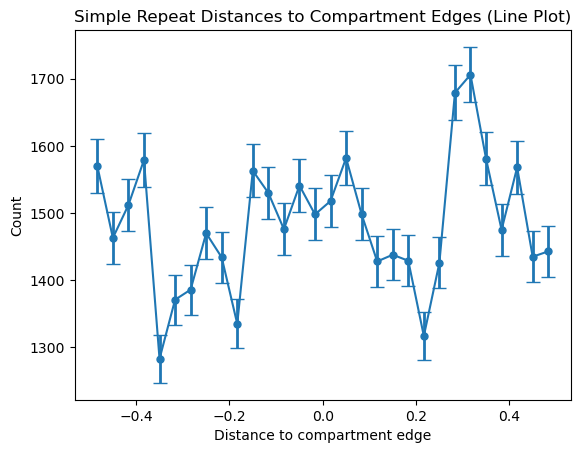

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaNs from 'start'
start_values = results_simple_repeatv2['start'].dropna()

# Calculate histogram data
counts, bin_edges = np.histogram(start_values, bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate error bars (Poisson statistics)
errors = np.sqrt(counts)

# To always show error bars, set a minimum error (optional)
min_error = 1
errors = np.maximum(errors, min_error)

# Plot line with error bars
plt.errorbar(bin_centers, counts, yerr=errors, marker='o', linestyle='-', capsize=5, markersize=5, elinewidth=2)
plt.xlabel('Distance to compartment edge')
plt.ylabel('Count')
plt.title('Simple Repeat Distances to Compartment Edges (Line Plot)')
plt.show()

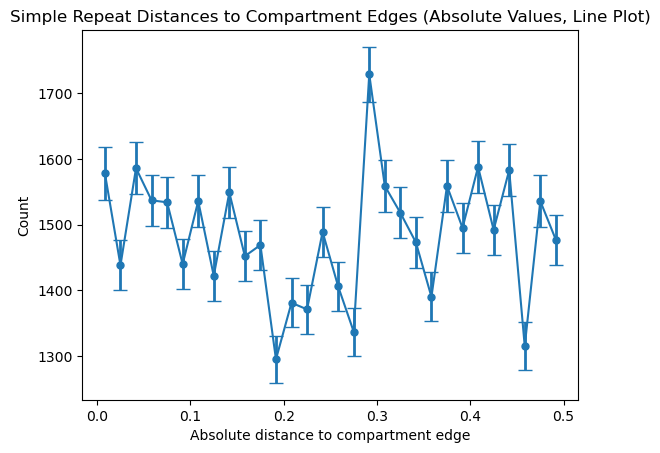

In [38]:
import numpy as np

import matplotlib.pyplot as plt

# Take absolute values of start_values
abs_start_values = start_values.abs()

# Calculate histogram data
counts, bin_edges = np.histogram(abs_start_values, bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate error bars (Poisson statistics)
errors = np.sqrt(counts)
min_error = 1
errors = np.maximum(errors, min_error)

# Plot line with error bars
plt.errorbar(bin_centers, counts, yerr=errors, marker='o', linestyle='-', capsize=5, markersize=5, elinewidth=2)
plt.xlabel('Absolute distance to compartment edge')
plt.ylabel('Count')
plt.title('Simple Repeat Distances to Compartment Edges (Absolute Values, Line Plot)')
plt.show()

In [39]:


# Create a new DataFrame with 'comp' from edges_comps and 'start', 'end', 'chrom' from eigen_interval
# First, ensure the lengths match for safe assignment (or align by index if needed)
new_df = pd.DataFrame({
    'comp': edges_comps['comp'].reset_index(drop=True),
    'start': eigen_interval['start'].reset_index(drop=True),
    'end': eigen_interval['end'].reset_index(drop=True),
    'chrom': eigen_interval['chrom'].reset_index(drop=True)
})
print(new_df.head())

comp_A = new_df[new_df['comp'] == 'A'].reset_index(drop=True)
comp_B = new_df[new_df['comp'] == 'B'].reset_index(drop=True)
print("comp_A shape:", comp_A.shape)
print("comp_B shape:", comp_B.shape)


  comp       start         end chrom
0    A   9700000.0   9700001.0  chrX
1    A  10000000.0  10000001.0  chrX
2    B  10100000.0  10100001.0  chrX
3    A  10200000.0  10200001.0  chrX
4    B  10400000.0  10400001.0  chrX
comp_A shape: (85, 4)
comp_B shape: (89, 4)


### we may need to make some filter to ensure that we only remap to each data point onece

In [40]:
df_simple_repeats = simple_repeats[['chrom', 'chromStart', 'chromEnd']].rename(
    columns={'chromStart': 'start', 'chromEnd': 'end'}
)
df_comp_A = comp_A [['chrom', 'start', 'end']].copy()
df_comp_B = comp_B [['chrom', 'start', 'end']].copy()
print(df_comp_A.head())
print(df_simple_repeats.head())


## remapping for compartment A
# Calculate distances between compartments and repeats
results_simple_repeat_compA = remap_interval_data( df_simple_repeats,df_comp_A)
results_simple_repeat_compA["mid"]=(results_simple_repeat_compA["start"] + results_simple_repeat_compA["end"] ) / 2
results_simple_repeat_compA["absmid"] = results_simple_repeat_compA["mid"].abs()
# Replace -0.0 and 0.0 with np.nan in 'start'
results_simple_repeat_compA['start'] = results_simple_repeat_compA['start'].replace(-0.0, np.nan)
results_simple_repeat_compA['start'] = results_simple_repeat_compA['start'].replace(0.0, np.nan)
results_simple_repeat_compA['end'] = results_simple_repeat_compA['end'].replace(-0.0, np.nan)
results_simple_repeat_compA['end'] = results_simple_repeat_compA['end'].replace(0.0, np.nan)
results_simple_repeat_compA['mid'] = results_simple_repeat_compA['mid'].replace(-0.0, np.nan)
results_simple_repeat_compA['mid'] = results_simple_repeat_compA['mid'].replace(0.0, np.nan)
results_simple_repeat_compA['absmid'] = results_simple_repeat_compA['absmid'].replace(-0.0, np.nan)
results_simple_repeat_compA['absmid'] = results_simple_repeat_compA['absmid'].replace(0.0, np.nan)

## remapping for compartment B
# Calculate distances between compartments and repeats
results_simple_repeat_compB = remap_interval_data( df_simple_repeats,df_comp_B)
results_simple_repeat_compB["mid"]=(results_simple_repeat_compB["start"] + results_simple_repeat_compB["end"] ) / 2
results_simple_repeat_compB["absmid"] = results_simple_repeat_compB["mid"].abs()
# Replace -0.0 and 0.0 with np.nan in 'start'
results_simple_repeat_compB['start'] = results_simple_repeat_compB['start'].replace(-0.0, np.nan)
results_simple_repeat_compB['start'] = results_simple_repeat_compB['start'].replace(0.0, np.nan)
results_simple_repeat_compB['end'] = results_simple_repeat_compB['end'].replace(-0.0, np.nan)
results_simple_repeat_compB['end'] = results_simple_repeat_compB['end'].replace(0.0, np.nan)
results_simple_repeat_compB['mid'] = results_simple_repeat_compB['mid'].replace(-0.0, np.nan)
results_simple_repeat_compB['mid'] = results_simple_repeat_compB['mid'].replace(0.0, np.nan)
results_simple_repeat_compB['absmid'] = results_simple_repeat_compB['absmid'].replace(-0.0, np.nan)
results_simple_repeat_compB['absmid'] = results_simple_repeat_compB['absmid'].replace(0.0, np.nan)


  chrom       start         end
0  chrX   9700000.0   9700001.0
1  chrX  10000000.0  10000001.0
2  chrX  10200000.0  10200001.0
3  chrX  10500000.0  10500001.0
4  chrX  11100000.0  11100001.0
       chrom  start   end
935331  chrX   1329  1368
935332  chrX   4721  4765
935333  chrX   4722  5839
935334  chrX   4767  4806
935335  chrX   4783  4826


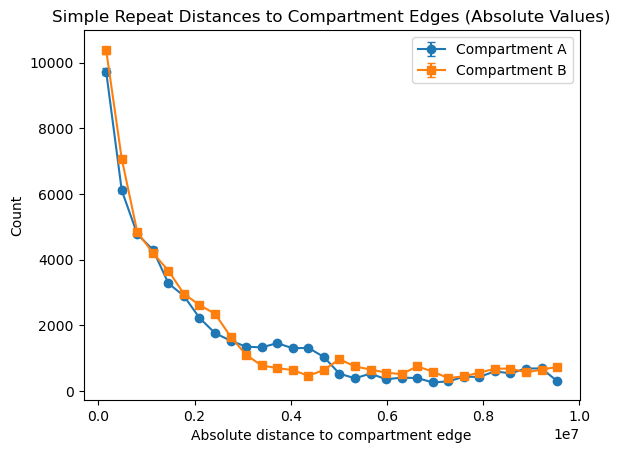

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Take absolute values of 'start' for both compartments and drop NaNs
abs_start_A = results_simple_repeat_compA['start'].dropna().abs()
abs_start_B = results_simple_repeat_compB['start'].dropna().abs()

# Calculate histogram data for both
counts_A, bin_edges = np.histogram(abs_start_A, bins=30)
counts_B, _ = np.histogram(abs_start_B, bins=bin_edges)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate error bars (Poisson statistics)
errors_A = np.sqrt(counts_A)
errors_B = np.sqrt(counts_B)

# Plot both lines with error bars
plt.errorbar(bin_centers, counts_A, yerr=errors_A, marker='o', linestyle='-', capsize=3, label='Compartment A')
plt.errorbar(bin_centers, counts_B, yerr=errors_B, marker='s', linestyle='-', capsize=3, label='Compartment B')
plt.xlabel('Absolute distance to compartment edge')
plt.ylabel('Count')
plt.title('Simple Repeat Distances to Compartment Edges (Absolute Values)')
plt.legend()
plt.show()


### Filter df_simple_repeats to keep only rows where chromStart is within 2,000,000 of any df_comp_A['start']
### filter df_simple_repeats to keep only rows where chromStart is within 2,000,000 of any df_comp_B['start']

In [42]:
df_simple_repeats = simple_repeats[['chrom', 'chromStart', 'chromEnd']].rename(
    columns={'chromStart': 'start', 'chromEnd': 'end'}
)
df_comp_A = comp_A [['chrom', 'start', 'end']].copy()
df_comp_B = comp_B [['chrom', 'start', 'end']].copy()
print(df_comp_A.head())


# Filter df_simple_repeats to keep only rows where chromStart is within 2,000,000 of any df_comp_A['start']
max_distance = 2_000_000
starts_A = df_comp_A['start'].dropna().values

df_simple_repeats_A = df_simple_repeats[
    df_simple_repeats['start'].apply(lambda x: np.any(np.abs(starts_A - x) <= max_distance))
]
# filter df_simple_repeats to keep only rows where chromStart is within 2,000,000 of any df_comp_B['start']
starts_B = df_comp_B['start'].dropna().values
df_simple_repeats_B = df_simple_repeats[
    df_simple_repeats['start'].apply(lambda x: np.any(np.abs(starts_B - x) <= max_distance))
]   

print("Filtered df_simple_repeats shape:", df_simple_repeats_A.shape)
print("Filtered df_simple_repeats shape:", df_simple_repeats_B.shape)


  chrom       start         end
0  chrX   9700000.0   9700001.0
1  chrX  10000000.0  10000001.0
2  chrX  10200000.0  10200001.0
3  chrX  10500000.0  10500001.0
4  chrX  11100000.0  11100001.0
Filtered df_simple_repeats shape: (33234, 3)
Filtered df_simple_repeats shape: (33646, 3)


In [43]:

## remapping for compartment A
# Calculate distances between compartments and repeats
results_simple_repeat_compA = remap_interval_data( df_simple_repeats_A,df_comp_A)
results_simple_repeat_compA["mid"]=(results_simple_repeat_compA["start"] + results_simple_repeat_compA["end"] ) / 2
results_simple_repeat_compA["absmid"] = results_simple_repeat_compA["mid"].abs()
# Replace -0.0 and 0.0 with np.nan in 'start'
results_simple_repeat_compA['start'] = results_simple_repeat_compA['start'].replace(-0.0, np.nan)
results_simple_repeat_compA['start'] = results_simple_repeat_compA['start'].replace(0.0, np.nan)
results_simple_repeat_compA['end'] = results_simple_repeat_compA['end'].replace(-0.0, np.nan)
results_simple_repeat_compA['end'] = results_simple_repeat_compA['end'].replace(0.0, np.nan)
results_simple_repeat_compA['mid'] = results_simple_repeat_compA['mid'].replace(-0.0, np.nan)
results_simple_repeat_compA['mid'] = results_simple_repeat_compA['mid'].replace(0.0, np.nan)
results_simple_repeat_compA['absmid'] = results_simple_repeat_compA['absmid'].replace(-0.0, np.nan)
results_simple_repeat_compA['absmid'] = results_simple_repeat_compA['absmid'].replace(0.0, np.nan)

## remapping for compartment B
# Calculate distances between compartments and repeats
results_simple_repeat_compB = remap_interval_data( df_simple_repeats_B,df_comp_B)
results_simple_repeat_compB["mid"]=(results_simple_repeat_compB["start"] + results_simple_repeat_compB["end"] ) / 2
results_simple_repeat_compB["absmid"] = results_simple_repeat_compB["mid"].abs()
# Replace -0.0 and 0.0 with np.nan in 'start'
results_simple_repeat_compB['start'] = results_simple_repeat_compB['start'].replace(-0.0, np.nan)
results_simple_repeat_compB['start'] = results_simple_repeat_compB['start'].replace(0.0, np.nan)
results_simple_repeat_compB['end'] = results_simple_repeat_compB['end'].replace(-0.0, np.nan)
results_simple_repeat_compB['end'] = results_simple_repeat_compB['end'].replace(0.0, np.nan)
results_simple_repeat_compB['mid'] = results_simple_repeat_compB['mid'].replace(-0.0, np.nan)
results_simple_repeat_compB['mid'] = results_simple_repeat_compB['mid'].replace(0.0, np.nan)
results_simple_repeat_compB['absmid'] = results_simple_repeat_compB['absmid'].replace(-0.0, np.nan)
results_simple_repeat_compB['absmid'] = results_simple_repeat_compB['absmid'].replace(0.0, np.nan)

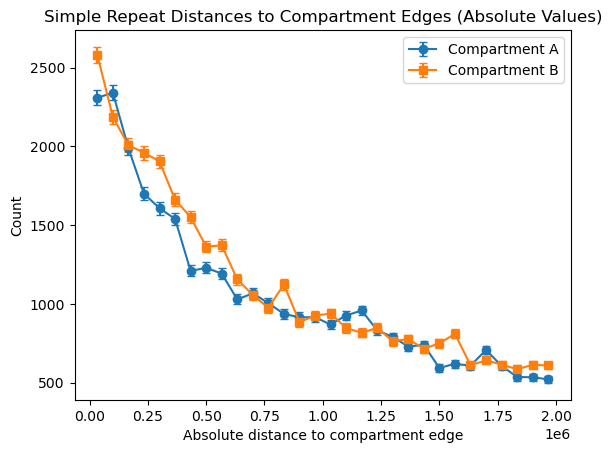

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Take absolute values of 'start' for both compartments and drop NaNs
abs_start_A = results_simple_repeat_compA['start'].dropna().abs()
abs_start_B = results_simple_repeat_compB['start'].dropna().abs()

# Calculate histogram data for both
counts_A, bin_edges = np.histogram(abs_start_A, bins=30)
counts_B, _ = np.histogram(abs_start_B, bins=bin_edges)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate error bars (Poisson statistics)
errors_A = np.sqrt(counts_A)
errors_B = np.sqrt(counts_B)

# Plot both lines with error bars
plt.errorbar(bin_centers, counts_A, yerr=errors_A, marker='o', linestyle='-', capsize=3, label='Compartment A')
plt.errorbar(bin_centers, counts_B, yerr=errors_B, marker='s', linestyle='-', capsize=3, label='Compartment B')
plt.xlabel('Absolute distance to compartment edge')
plt.ylabel('Count')
plt.title('Simple Repeat Distances to Compartment Edges (Absolute Values)')
plt.legend()
plt.show()

### try for all 5 dataset


In [45]:
import os

# Load data
eigentrack_dir = "/home/johanulstrup/johan_gpn/people/johanulsrup/johan_gpn/data/eigentracks"
eigentrack_files = [
    f for f in os.listdir(eigentrack_dir) if f.endswith("_10Mb.csv")
]

comps_dict = {}
edges_dict = {}
generated_comps=[]
generated_edges=[]
a_and_b_comps = []

for filename in eigentrack_files:
    filepath = os.path.join(eigentrack_dir, filename)
    base = os.path.splitext(filename)[0]
    comps_var = f"{base}_comps"
    edges_var = f"{base}_edges"
    comps, edges = parse_compartment_data(filepath)
    comps_dict[comps_var] = comps
    edges_dict[edges_var] = edges
    generated_comps.append(comps_var)
    generated_edges.append(edges_var)

#print("Generated variable names:", generated_comps)
#print("Generated variable names:", generated_edges)

for edge_var in generated_edges:
    # Get the numpy array of edges from the dictionary
    edges = edges_dict[edge_var]
    
    # Create the DataFrame using edge_segments with flank=1
    seg_name = f"{edge_var}_interval"
    seg_df = edge_segments(edges, 1)
    #print(f"Created: {seg_name}")

    # Merge compartment assignment
    comps_var = edge_var.replace("_edges", "_comps")
    if comps_var in comps_dict:
        comps_df = comps_dict[comps_var]
        
        comp_df = pd.DataFrame({
            'comp': comps_df['comp'].reset_index(drop=True),
            'start': seg_df['start'].reset_index(drop=True),
            'end': seg_df['end'].reset_index(drop=True),
            'chrom': seg_df['chrom'].reset_index(drop=True)
        })

        # Save full merged comp_df
        comp_full_name = f"{edge_var}_interval_comp"

        #print(f"Created: {comp_full_name}")

        # Split into compartments A and B
        comp_A = comp_df[comp_df['comp'] == 'A'].reset_index(drop=True)
        comp_B = comp_df[comp_df['comp'] == 'B'].reset_index(drop=True)

        # Save A and B splits as new variables
        comp_A_name = f"{edge_var}_A"
        comp_B_name = f"{edge_var}_B"
        globals()[comp_A_name] = comp_A
        globals()[comp_B_name] = comp_B
        a_and_b_comps.append(comp_A_name)
        a_and_b_comps.append(comp_B_name)
        #print(f"Created: {edge_var}_A and {edge_var}_B")

print("Generated compartment A and B variables:", a_and_b_comps)

print(sperm_e1_100kb_10Mb_edges_A.head())


Generated compartment A and B variables: ['sperm_e1_100kb_10Mb_edges_A', 'sperm_e1_100kb_10Mb_edges_B', 'round_spermatid_e1_100kb_10Mb_edges_A', 'round_spermatid_e1_100kb_10Mb_edges_B', 'pachytene_spermatocyte_e1_100kb_10Mb_edges_A', 'pachytene_spermatocyte_e1_100kb_10Mb_edges_B', 'spermatogonia_e1_100kb_10Mb_edges_A', 'spermatogonia_e1_100kb_10Mb_edges_B', 'fibroblast_e1_100kb_10Mb_edges_A', 'fibroblast_e1_100kb_10Mb_edges_B']
  comp       start         end chrom
0    A   2500000.0   2500001.0  chrX
1    A   8300000.0   8300001.0  chrX
2    A   9800000.0   9800001.0  chrX
3    A  10000000.0  10000001.0  chrX
4    A  10800000.0  10800001.0  chrX


In [52]:
# here the goal is to filter in the repeats file so we only keep repeats that are within 2,000,000 of the compartment start 
#print(simple_repeats.head())
df_simple_repeats = simple_repeats[['chrom', 'chromStart', 'chromEnd']].rename(
    columns={'chromStart': 'start', 'chromEnd': 'end'}
)
# Filter repeats within a defined distance from compartment starts
def filter_nearby_repeats(repeats_df, comp_df, max_distance=2_000_000):
    starts = comp_df['start'].dropna().values
    return repeats_df[repeats_df['start'].apply(lambda x: np.any(np.abs(starts - x) <= max_distance))]

filtered_repeats =[]
for name in a_and_b_comps:
    compartment_df = globals()[name]  # Get the compartment A or B DataFrame

    # Filter simple repeats using your function
    filtered_simple = filter_nearby_repeats(df_simple_repeats, compartment_df)

    # Create a dynamic name for the filtered result
    output_name = f"{name}_simple_filtered"

    # Store it as a global variable
    globals()[output_name] = filtered_simple
    filtered_repeats.append(output_name)
    #print(f"Created: {output_name}")


#print(sperm_e1_100kb_10Mb_edges_A_simple_filtered.head())
#print(df_simple_repeats.shape)
#print(df_simple_repeats.head())

# Remap repeats to compartments
def remap_and_clean(repeats_df, comp_df):
    result = remap_interval_data(repeats_df, comp_df)
    result["mid"] = (result["start"] + result["end"]) / 2
    result["absmid"] = result["mid"].abs()

    # Replace both 0.0 and -0.0 with NaN
    for col in ['start', 'end', 'mid', 'absmid']:
        result[col] = result[col].replace([0.0, -0.0], np.nan)

    return result

remapped_names = []
for name in a_and_b_comps:
    compartment_df = globals()[name]
    filtered_name = f"{name}_simple_filtered"
    
    if filtered_name in globals():
        filtered_df = globals()[filtered_name]
        remapped_df = remap_and_clean(filtered_df, compartment_df)
        remapped_name = f"{name}_simple_remapped"
        globals()[remapped_name] = remapped_df
        remapped_names.append(remapped_name)
        print(f"Created: {remapped_name}")




Created: sperm_e1_100kb_10Mb_edges_A_simple_remapped
Created: sperm_e1_100kb_10Mb_edges_B_simple_remapped
Created: round_spermatid_e1_100kb_10Mb_edges_A_simple_remapped
Created: round_spermatid_e1_100kb_10Mb_edges_B_simple_remapped
Created: pachytene_spermatocyte_e1_100kb_10Mb_edges_A_simple_remapped
Created: pachytene_spermatocyte_e1_100kb_10Mb_edges_B_simple_remapped
Created: spermatogonia_e1_100kb_10Mb_edges_A_simple_remapped
Created: spermatogonia_e1_100kb_10Mb_edges_B_simple_remapped
Created: fibroblast_e1_100kb_10Mb_edges_A_simple_remapped
Created: fibroblast_e1_100kb_10Mb_edges_B_simple_remapped



sns.pointplit seaborn

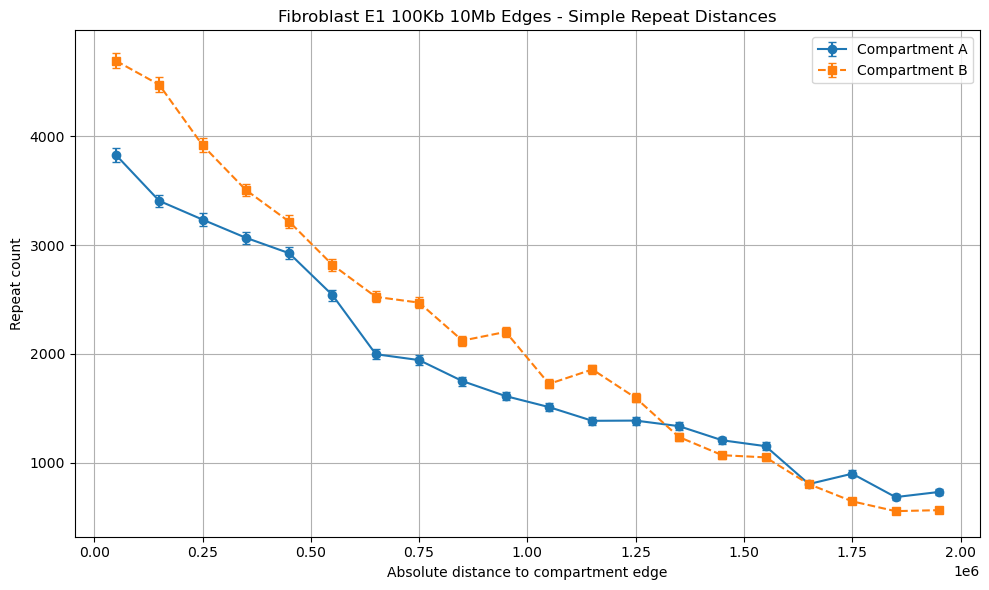

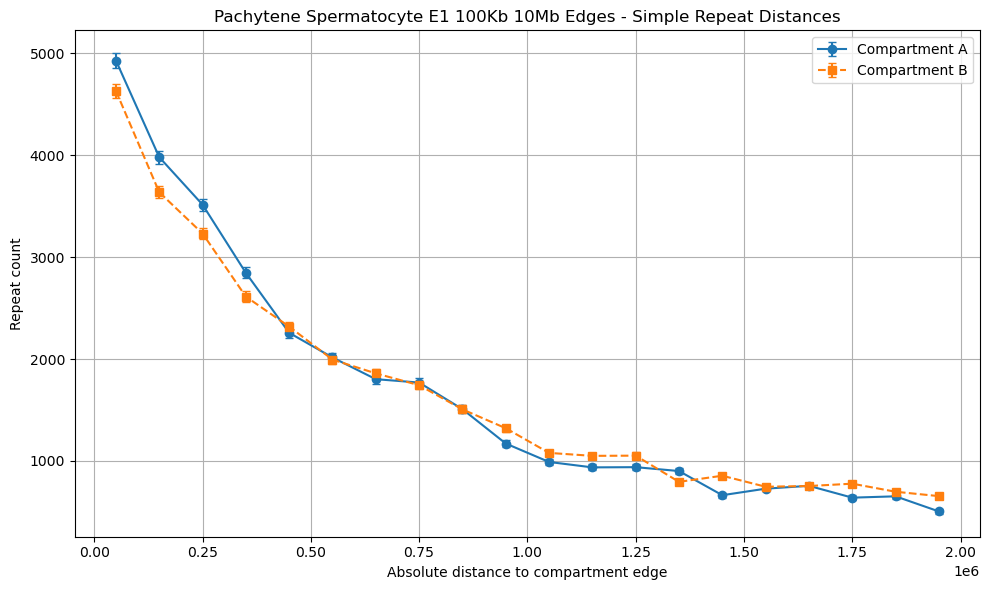

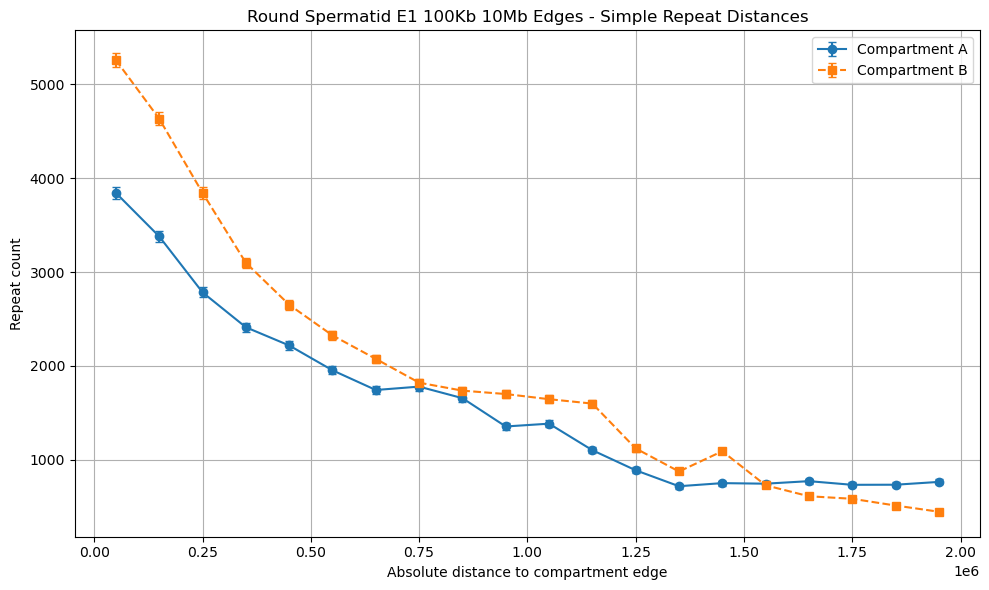

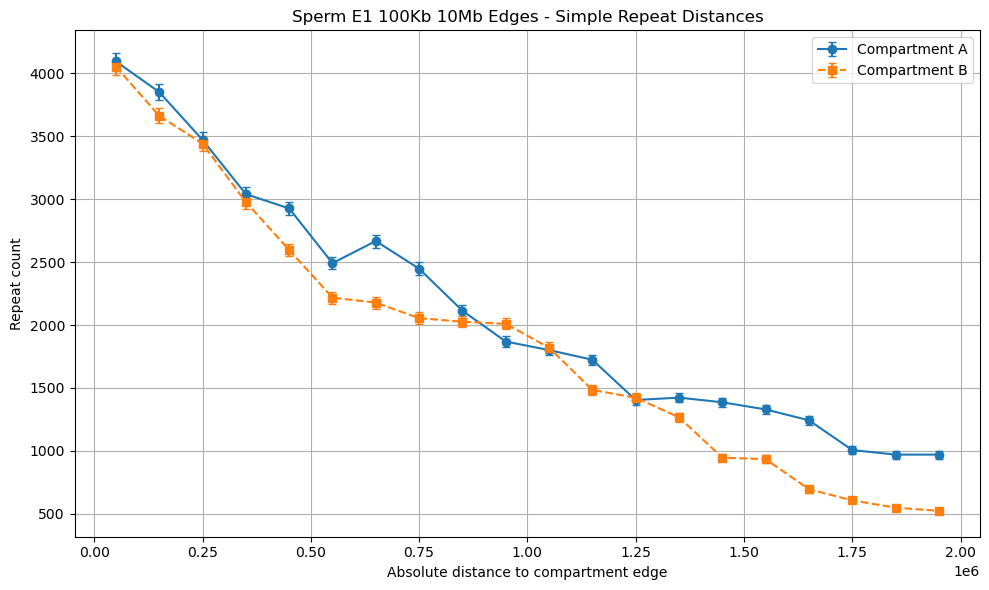

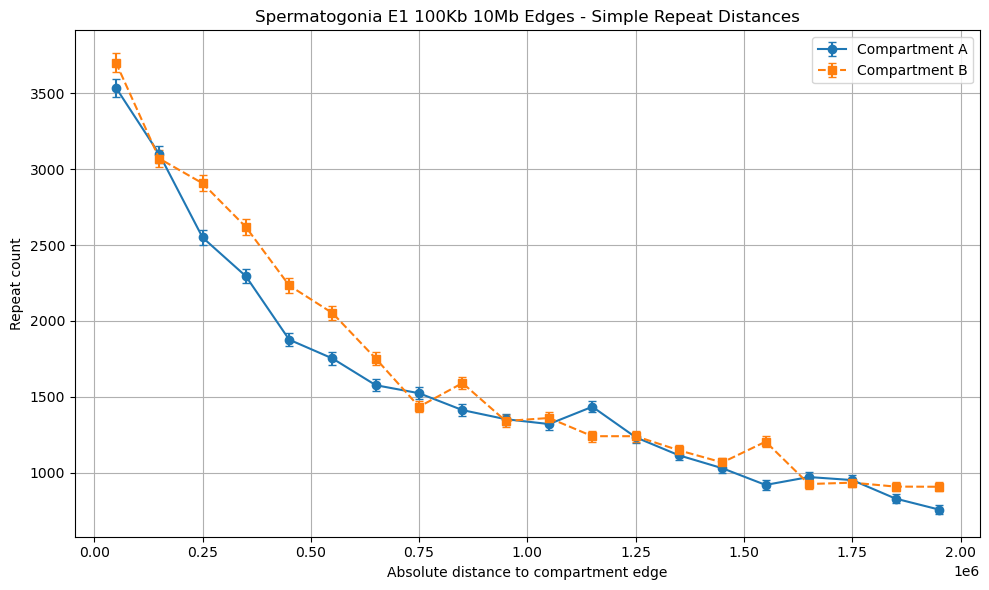

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
num_bins = 20
max_dist = 2_000_000
bins = np.linspace(0, max_dist, num_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# === Binning helper ===  ### kig på error bars
def bin_absmid_with_error(absmid_values, bins):
    counts, _ = np.histogram(absmid_values, bins=bins)
    errors = np.sqrt(counts)  # Poisson error
    return counts, errors

# === List of all remapped variable names ===
remapped_names = [
    "sperm_e1_100kb_10Mb_edges_A_simple_remapped",
    "sperm_e1_100kb_10Mb_edges_B_simple_remapped",
    "round_spermatid_e1_100kb_10Mb_edges_A_simple_remapped",
    "round_spermatid_e1_100kb_10Mb_edges_B_simple_remapped",
    "pachytene_spermatocyte_e1_100kb_10Mb_edges_A_simple_remapped",
    "pachytene_spermatocyte_e1_100kb_10Mb_edges_B_simple_remapped",
    "spermatogonia_e1_100kb_10Mb_edges_A_simple_remapped",
    "spermatogonia_e1_100kb_10Mb_edges_B_simple_remapped",
    "fibroblast_e1_100kb_10Mb_edges_A_simple_remapped",
    "fibroblast_e1_100kb_10Mb_edges_B_simple_remapped"
]

# === Group names into A/B pairs ===
sample_names = sorted(set(name.replace("_A_simple_remapped", "").replace("_B_simple_remapped", "") for name in remapped_names))

# === Plot for each sample ===
for sample in sample_names:
    a_name = f"{sample}_A_simple_remapped"
    b_name = f"{sample}_B_simple_remapped"

    if a_name in globals() and b_name in globals():
        df_A = globals()[a_name]
        df_B = globals()[b_name]

        # Drop NaNs
        absmid_A = df_A['absmid'].dropna()
        absmid_B = df_B['absmid'].dropna()

        # Bin data
        counts_A, errors_A = bin_absmid_with_error(absmid_A, bins)
        counts_B, errors_B = bin_absmid_with_error(absmid_B, bins)

        # Plot
        plt.figure(figsize=(10, 6))
        plt.errorbar(bin_centers, counts_A, yerr=errors_A, marker='o', linestyle='-', capsize=3, label='Compartment A')
        plt.errorbar(bin_centers, counts_B, yerr=errors_B, marker='s', linestyle='--', capsize=3, label='Compartment B')
        plt.xlabel('Absolute distance to compartment edge')
        plt.ylabel('Repeat count')
        plt.title(f'{sample.replace("_", " ").title()} - Simple Repeat Distances')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


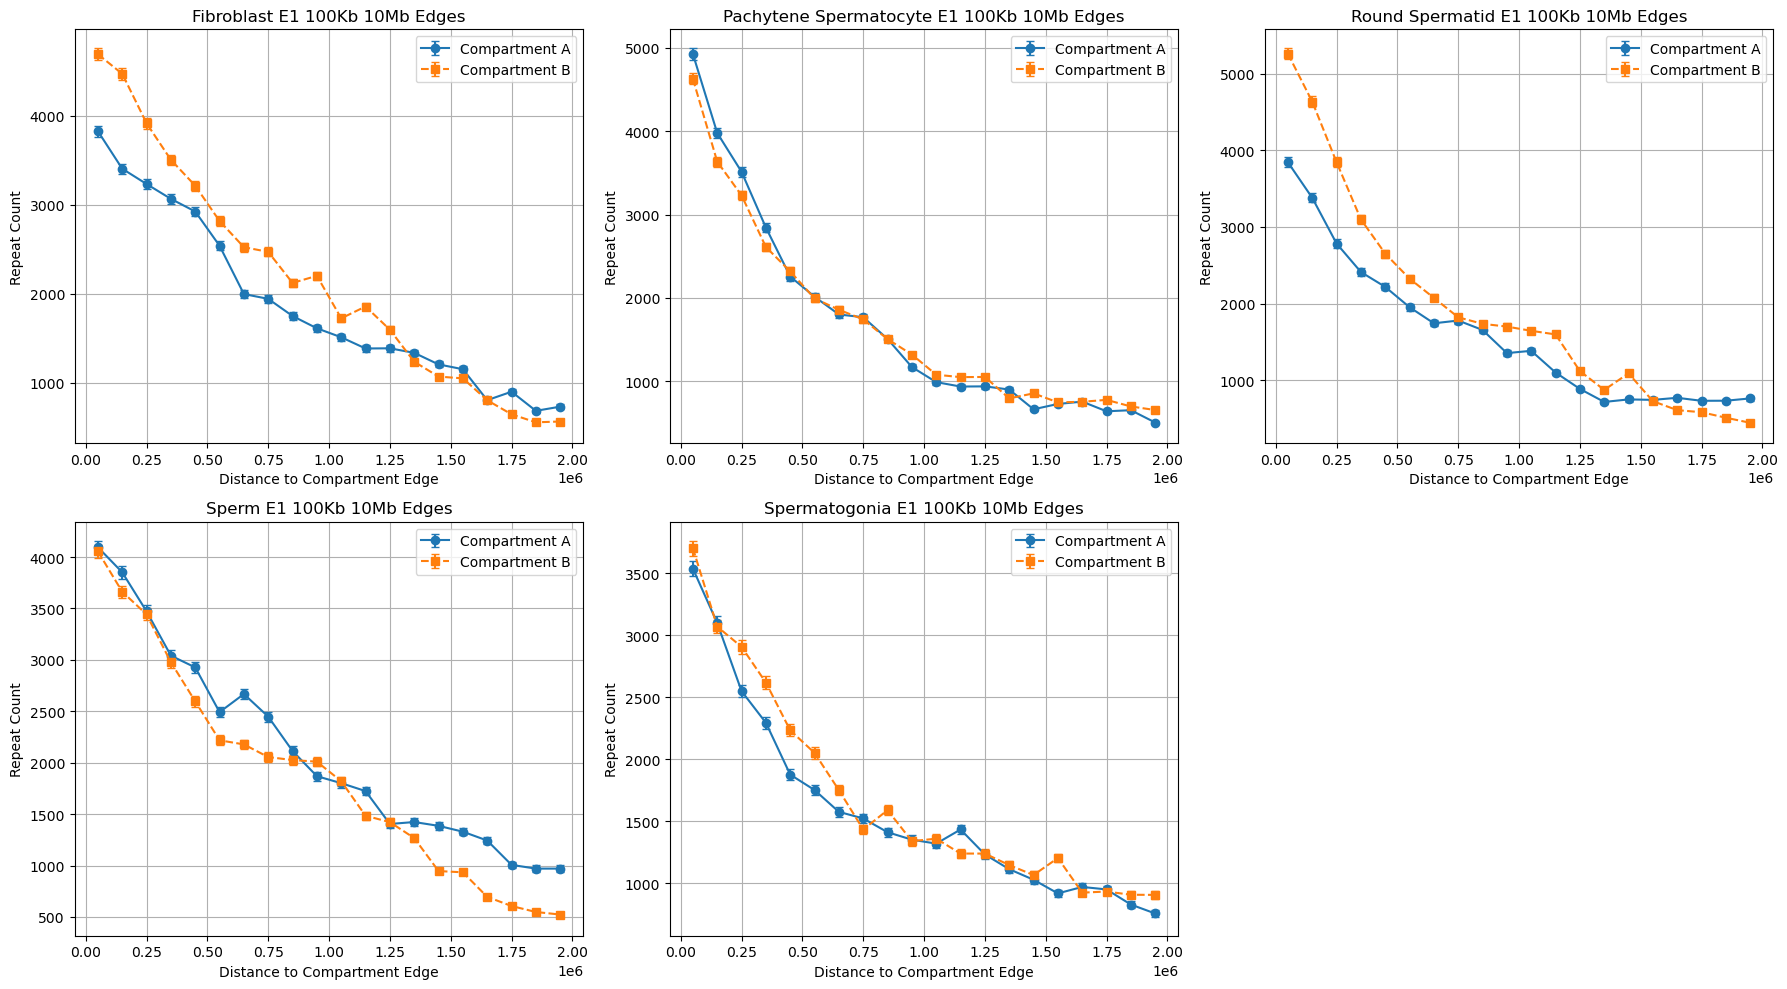

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
num_bins = 20
max_dist = 2_000_000
bins = np.linspace(0, max_dist, num_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

def bin_absmid_with_error(absmid_values, bins):
    counts, _ = np.histogram(absmid_values, bins=bins)
    errors = np.sqrt(counts)
    return counts, errors

# All remapped variable names (already created)
remapped_names = [
    "sperm_e1_100kb_10Mb_edges_A_simple_remapped",
    "sperm_e1_100kb_10Mb_edges_B_simple_remapped",
    "round_spermatid_e1_100kb_10Mb_edges_A_simple_remapped",
    "round_spermatid_e1_100kb_10Mb_edges_B_simple_remapped",
    "pachytene_spermatocyte_e1_100kb_10Mb_edges_A_simple_remapped",
    "pachytene_spermatocyte_e1_100kb_10Mb_edges_B_simple_remapped",
    "spermatogonia_e1_100kb_10Mb_edges_A_simple_remapped",
    "spermatogonia_e1_100kb_10Mb_edges_B_simple_remapped",
    "fibroblast_e1_100kb_10Mb_edges_A_simple_remapped",
    "fibroblast_e1_100kb_10Mb_edges_B_simple_remapped"
]

# Group into sample names
sample_names = sorted(set(name.replace("_A_simple_remapped", "").replace("_B_simple_remapped", "") for name in remapped_names))

# Set up 2x3 grid of subplots (with 5 actual plots, 1 empty)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, sample in enumerate(sample_names):
    a_name = f"{sample}_A_simple_remapped"
    b_name = f"{sample}_B_simple_remapped"
    
    if a_name in globals() and b_name in globals():
        df_A = globals()[a_name]
        df_B = globals()[b_name]
        
        absmid_A = df_A['absmid'].dropna()
        absmid_B = df_B['absmid'].dropna()
        
        counts_A, errors_A = bin_absmid_with_error(absmid_A, bins)
        counts_B, errors_B = bin_absmid_with_error(absmid_B, bins)
        
        ax = axes[idx]
        ax.errorbar(bin_centers, counts_A, yerr=errors_A, marker='o', linestyle='-', capsize=3, label='Compartment A')
        ax.errorbar(bin_centers, counts_B, yerr=errors_B, marker='s', linestyle='--', capsize=3, label='Compartment B')
        ax.set_title(sample.replace("_", " ").title())
        ax.set_xlabel("Distance to Compartment Edge")
        ax.set_ylabel("Repeat Count")
        ax.legend()
        ax.grid(True)

# Hide any unused subplot (6th one)
if len(sample_names) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


order 
Fibroblast

Spermatogonia

Pachytene Spermatocyte

Round Spermatid

Sperm

In [56]:
# here the goal is to filter in the repeats file so we only keep repeats that are within 2,000,000 of the compartment start 
#print(simple_repeats.head())
df_simple_repeats = simple_repeats[['chrom', 'chromStart', 'chromEnd']].rename(
    columns={'chromStart': 'start', 'chromEnd': 'end'}
)
# Filter repeats within a defined distance from compartment starts
def filter_nearby_repeats(repeats_df, comp_df, max_distance=500_000):
    starts = comp_df['start'].dropna().values
    return repeats_df[repeats_df['start'].apply(lambda x: np.any(np.abs(starts - x) <= max_distance))]

filtered_repeats =[]
for name in a_and_b_comps:
    compartment_df = globals()[name]  # Get the compartment A or B DataFrame

    # Filter simple repeats using your function
    filtered_simple = filter_nearby_repeats(df_simple_repeats, compartment_df)

    # Create a dynamic name for the filtered result
    output_name = f"{name}_simple_filtered_500kb"

    # Store it as a global variable
    globals()[output_name] = filtered_simple
    filtered_repeats.append(output_name)
    #print(f"Created: {output_name}")


#print(sperm_e1_100kb_10Mb_edges_A_simple_filtered.head())
#print(df_simple_repeats.shape)
#print(df_simple_repeats.head())

# Remap repeats to compartments
def remap_and_clean(repeats_df, comp_df):
    result = remap_interval_data(repeats_df, comp_df)
    result["mid"] = (result["start"] + result["end"]) / 2
    result["absmid"] = result["mid"].abs()

    # Replace both 0.0 and -0.0 with NaN
    for col in ['start', 'end', 'mid', 'absmid']:
        result[col] = result[col].replace([0.0, -0.0], np.nan)

    return result

remapped_names_500kb = []
for name in a_and_b_comps:
    compartment_df = globals()[name]
    filtered_name = f"{name}_simple_filtered_500kb"
    
    if filtered_name in globals():
        filtered_df = globals()[filtered_name]
        remapped_df = remap_and_clean(filtered_df, compartment_df)
        remapped_name = f"{name}_simple_remapped_500kb"
        globals()[remapped_name] = remapped_df
        remapped_names_500kb.append(remapped_name)
        print(f"Created: {remapped_name}")

Created: sperm_e1_100kb_10Mb_edges_A_simple_remapped_500kb
Created: sperm_e1_100kb_10Mb_edges_B_simple_remapped_500kb
Created: round_spermatid_e1_100kb_10Mb_edges_A_simple_remapped_500kb
Created: round_spermatid_e1_100kb_10Mb_edges_B_simple_remapped_500kb
Created: pachytene_spermatocyte_e1_100kb_10Mb_edges_A_simple_remapped_500kb
Created: pachytene_spermatocyte_e1_100kb_10Mb_edges_B_simple_remapped_500kb
Created: spermatogonia_e1_100kb_10Mb_edges_A_simple_remapped_500kb
Created: spermatogonia_e1_100kb_10Mb_edges_B_simple_remapped_500kb
Created: fibroblast_e1_100kb_10Mb_edges_A_simple_remapped_500kb
Created: fibroblast_e1_100kb_10Mb_edges_B_simple_remapped_500kb


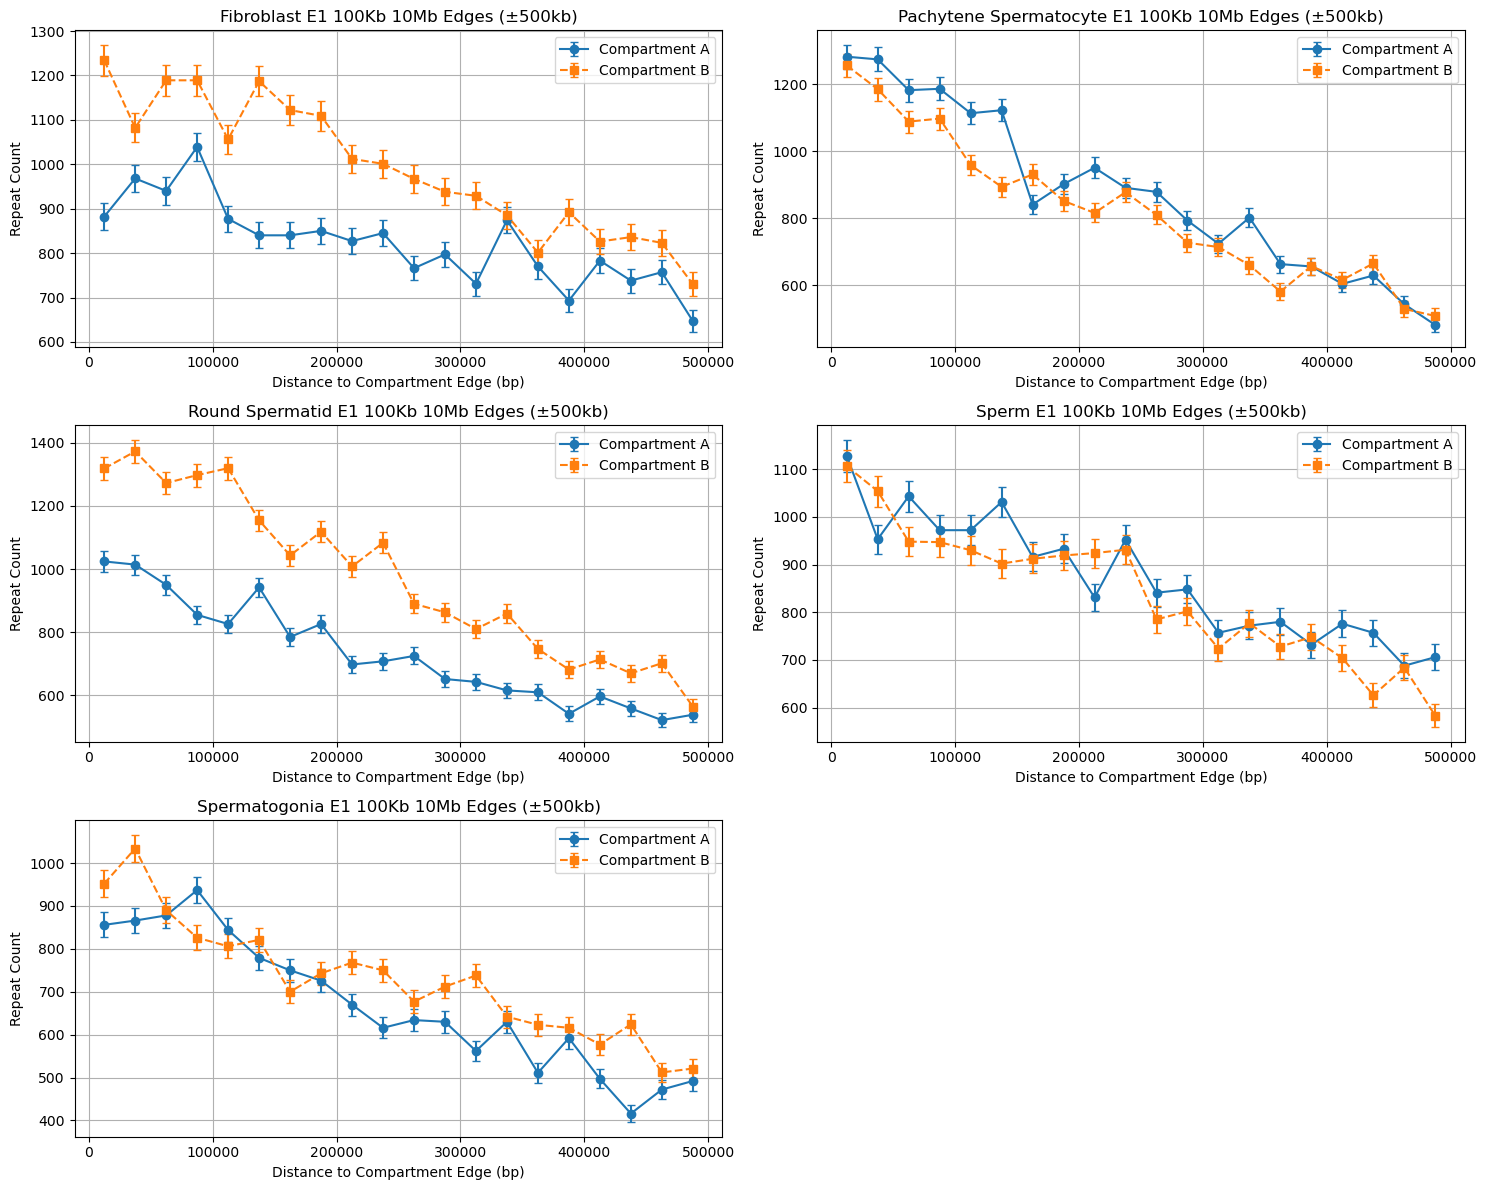

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
num_bins = 20
max_dist = 500_000
bins = np.linspace(0, max_dist, num_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

def bin_absmid_with_error(absmid_values, bins):
    counts, _ = np.histogram(absmid_values, bins=bins)
    errors = np.sqrt(counts)
    return counts, errors

# === Generate sample names ===
sample_names = sorted(set(
    name.replace("_A_simple_remapped_500kb", "").replace("_B_simple_remapped_500kb", "")
    for name in remapped_names_500kb
))

# === Prepare subplot grid ===
num_samples = min(6, len(sample_names))  # limit to 6 for 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# === Plot ===
for i, sample in enumerate(sample_names[:num_samples]):
    a_name = f"{sample}_A_simple_remapped_500kb"
    b_name = f"{sample}_B_simple_remapped_500kb"

    if a_name in globals() and b_name in globals():
        df_A = globals()[a_name]
        df_B = globals()[b_name]

        absmid_A = df_A['absmid'].dropna()
        absmid_B = df_B['absmid'].dropna()

        counts_A, errors_A = bin_absmid_with_error(absmid_A, bins)
        counts_B, errors_B = bin_absmid_with_error(absmid_B, bins)

        ax = axes[i]
        ax.errorbar(bin_centers, counts_A, yerr=errors_A, marker='o', linestyle='-', capsize=3, label='Compartment A')
        ax.errorbar(bin_centers, counts_B, yerr=errors_B, marker='s', linestyle='--', capsize=3, label='Compartment B')
        ax.set_title(sample.replace("_", " ").title() + " (±500kb)")
        ax.set_xlabel('Distance to Compartment Edge (bp)')
        ax.set_ylabel('Repeat Count')
        ax.grid(True)
        ax.legend()

# === Hide unused subplots (if fewer than 6 samples) ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df_rep # nested repeats dataframe


# here the goal is to filter in the repeats file so we only keep repeats that are within 2,000,000 of the compartment start 
#print(simple_repeats.head())
df_nested_repeats = df_rep

# Filter repeats within a defined distance from compartment starts
def filter_nearby_repeats(repeats_df, comp_df, max_distance=2_000_000):
    starts = comp_df['start'].dropna().values
    return repeats_df[repeats_df['start'].apply(lambda x: np.any(np.abs(starts - x) <= max_distance))]

filtered_repeats =[]
for name in a_and_b_comps:
    compartment_df = globals()[name]  # Get the compartment A or B DataFrame

    # Filter simple repeats using your function
    filtered_simple = filter_nearby_repeats(df_nested_repeats, compartment_df)

    # Create a dynamic name for the filtered result
    output_name = f"{name}_nested_filtered"

    # Store it as a global variable
    globals()[output_name] = filtered_simple
    filtered_repeats.append(output_name)
    #print(f"Created: {output_name}")


#print(sperm_e1_100kb_10Mb_edges_A_simple_filtered.head())
#print(df_simple_repeats.shape)
#print(df_simple_repeats.head())

# Remap repeats to compartments
def remap_and_clean(repeats_df, comp_df):
    result = remap_interval_data(repeats_df, comp_df)
    result["mid"] = (result["start"] + result["end"]) / 2
    result["absmid"] = result["mid"].abs()

    # Replace both 0.0 and -0.0 with NaN
    for col in ['start', 'end', 'mid', 'absmid']:
        result[col] = result[col].replace([0.0, -0.0], np.nan)

    return result

remapped_names_nested = []
for name in a_and_b_comps:
    compartment_df = globals()[name]
    filtered_name = f"{name}_nested_filtered"
    
    if filtered_name in globals():
        filtered_df = globals()[filtered_name]
        remapped_df = remap_and_clean(filtered_df, compartment_df)
        remapped_name = f"{name}_nested_remapped"
        globals()[remapped_name] = remapped_df
        remapped_names_nested.append(remapped_name)
        print(f"Created: {remapped_name}")

print(sperm_e1_100kb_10Mb_edges_A_nested_remapped.head()
      )

Created: sperm_e1_100kb_10Mb_edges_A_nested_remapped
Created: sperm_e1_100kb_10Mb_edges_B_nested_remapped
Created: round_spermatid_e1_100kb_10Mb_edges_A_nested_remapped
Created: round_spermatid_e1_100kb_10Mb_edges_B_nested_remapped
Created: pachytene_spermatocyte_e1_100kb_10Mb_edges_A_nested_remapped
Created: pachytene_spermatocyte_e1_100kb_10Mb_edges_B_nested_remapped
Created: spermatogonia_e1_100kb_10Mb_edges_A_nested_remapped
Created: spermatogonia_e1_100kb_10Mb_edges_B_nested_remapped
Created: fibroblast_e1_100kb_10Mb_edges_A_nested_remapped
Created: fibroblast_e1_100kb_10Mb_edges_B_nested_remapped
       start        end chrom  start_orig  end_orig        mid     absmid
0 -1997768.0 -1999070.0  chrX      500930    502232 -1998419.0  1998419.0
1 -1995155.0 -1995738.0  chrX      504262    504845 -1995446.5  1995446.5
2 -1988156.0 -1989021.0  chrX      510979    511844 -1988588.5  1988588.5
3 -1987400.0 -1988150.0  chrX      511850    512600 -1987775.0  1987775.0
4 -1985534.0 -198620

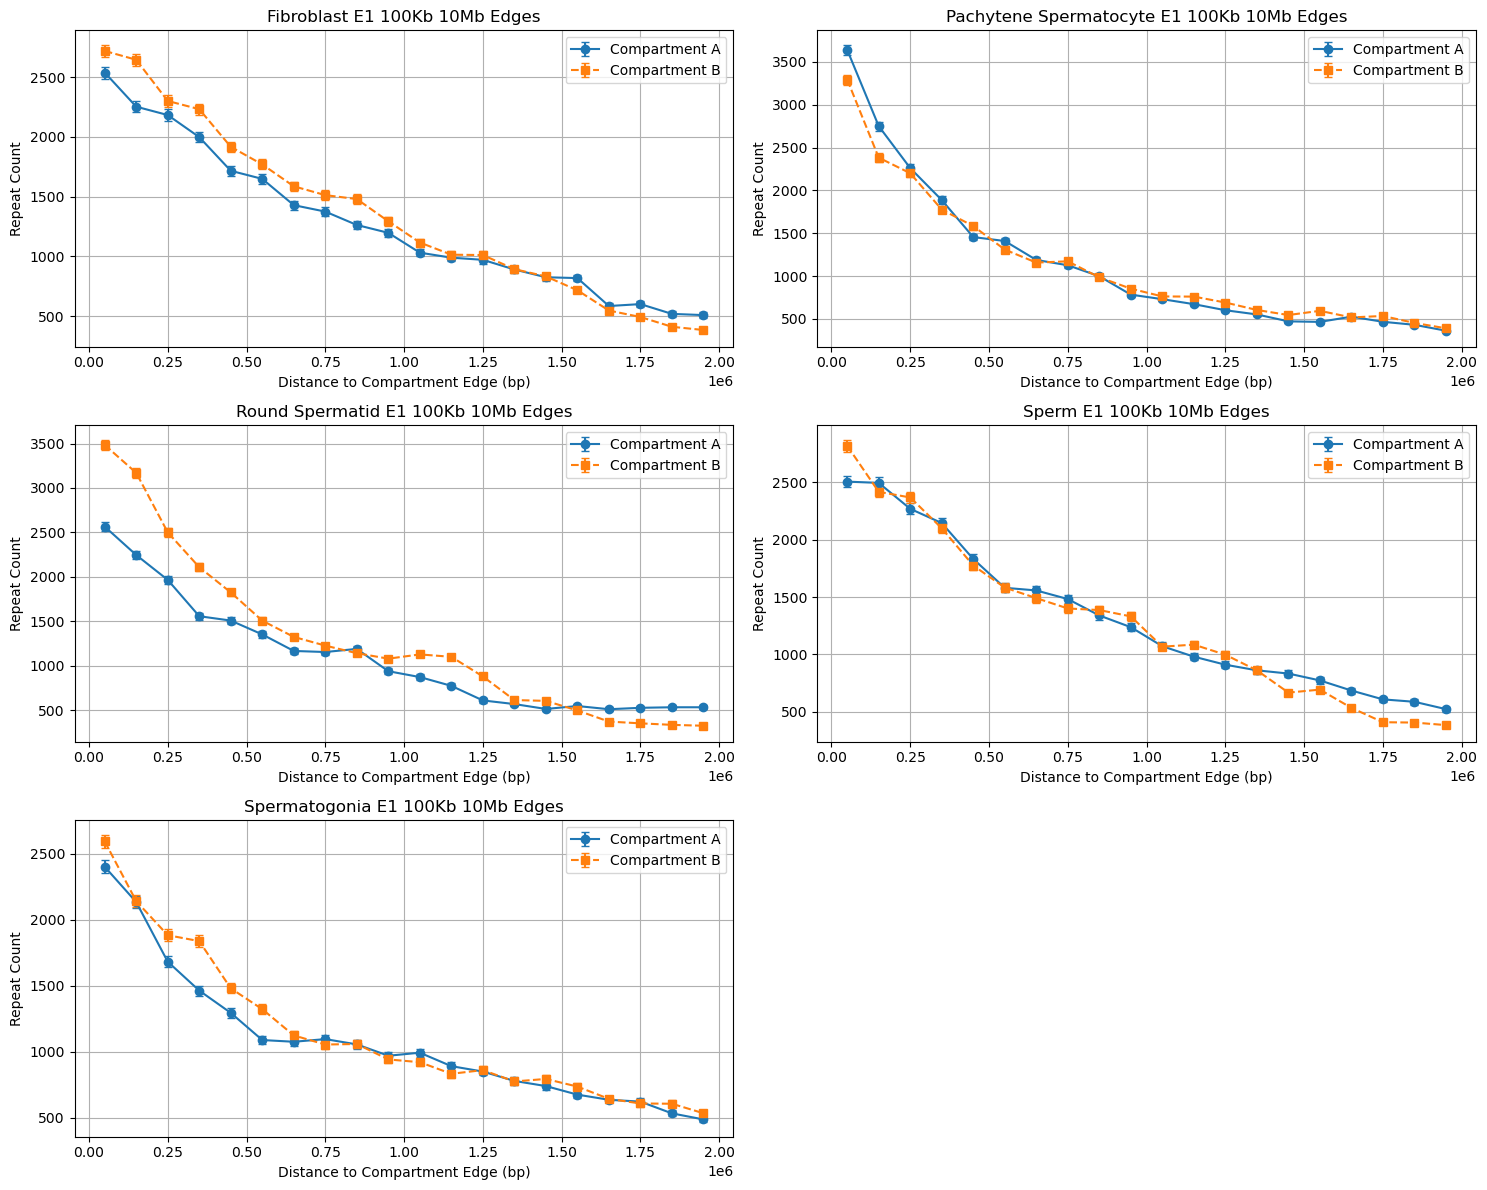

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
num_bins = 20
max_dist = 2_000_000
bins = np.linspace(0, max_dist, num_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# === Binning helper ===
def bin_absmid_with_error(absmid_values, bins):
    counts, _ = np.histogram(absmid_values, bins=bins)
    errors = np.sqrt(counts)  # Poisson error
    return counts, errors

# === List of all remapped variable names ===
remapped_names = [
    "sperm_e1_100kb_10Mb_edges_A_nested_remapped",
    "sperm_e1_100kb_10Mb_edges_B_nested_remapped",
    "round_spermatid_e1_100kb_10Mb_edges_A_nested_remapped",
    "round_spermatid_e1_100kb_10Mb_edges_B_nested_remapped",
    "pachytene_spermatocyte_e1_100kb_10Mb_edges_A_nested_remapped",
    "pachytene_spermatocyte_e1_100kb_10Mb_edges_B_nested_remapped",
    "spermatogonia_e1_100kb_10Mb_edges_A_nested_remapped",
    "spermatogonia_e1_100kb_10Mb_edges_B_nested_remapped",
    "fibroblast_e1_100kb_10Mb_edges_A_nested_remapped",
    "fibroblast_e1_100kb_10Mb_edges_B_nested_remapped"
]

# === Group names into A/B pairs ===
sample_names = sorted(set(name.replace("_A_nested_remapped", "").replace("_B_nested_remapped", "") for name in remapped_names))

# === Prepare 3x2 subplots ===
num_plots = 6
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Easier to index

# === Plot the first 6 samples ===
for i, sample in enumerate(sample_names[:num_plots]):
    a_name = f"{sample}_A_nested_remapped"
    b_name = f"{sample}_B_nested_remapped"

    if a_name in globals() and b_name in globals():
        df_A = globals()[a_name]
        df_B = globals()[b_name]

        absmid_A = df_A['absmid'].dropna()
        absmid_B = df_B['absmid'].dropna()

        counts_A, errors_A = bin_absmid_with_error(absmid_A, bins)
        counts_B, errors_B = bin_absmid_with_error(absmid_B, bins)

        ax = axes[i]
        ax.errorbar(bin_centers, counts_A, yerr=errors_A, marker='o', linestyle='-', capsize=3, label='Compartment A')
        ax.errorbar(bin_centers, counts_B, yerr=errors_B, marker='s', linestyle='--', capsize=3, label='Compartment B')
        ax.set_title(f'{sample.replace("_", " ").title()}')
        ax.set_xlabel('Distance to Compartment Edge (bp)')
        ax.set_ylabel('Repeat Count')
        ax.grid(True)
        ax.legend()

# === Hide unused subplots if fewer than 6 samples ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [72]:
# here the goal is to filter in the repeats file so we only keep repeats that are within 2,000,000 of the compartment start 
#print(simple_repeats.head())


# Filter repeats within a defined distance from compartment starts
def filter_nearby_repeats(repeats_df, comp_df, max_distance=500_000):
    starts = comp_df['start'].dropna().values
    return repeats_df[repeats_df['start'].apply(lambda x: np.any(np.abs(starts - x) <= max_distance))]

filtered_repeats =[]
for name in a_and_b_comps:
    compartment_df = globals()[name]  # Get the compartment A or B DataFrame

    # Filter simple repeats using your function
    filtered_simple = filter_nearby_repeats(df_nested_repeats, compartment_df)

    # Create a dynamic name for the filtered result
    output_name = f"{name}_nested_filtered_500kb"

    # Store it as a global variable
    globals()[output_name] = filtered_simple
    filtered_repeats.append(output_name)
    #print(f"Created: {output_name}")


#print(sperm_e1_100kb_10Mb_edges_A_simple_filtered.head())
#print(df_simple_repeats.shape)
#print(df_simple_repeats.head())

# Remap repeats to compartments
def remap_and_clean(repeats_df, comp_df):
    result = remap_interval_data(repeats_df, comp_df)
    result["mid"] = (result["start"] + result["end"]) / 2
    result["absmid"] = result["mid"].abs()

    # Replace both 0.0 and -0.0 with NaN
    for col in ['start', 'end', 'mid', 'absmid']:
        result[col] = result[col].replace([0.0, -0.0], np.nan)

    return result

remapped_names_500kb = []
for name in a_and_b_comps:
    compartment_df = globals()[name]
    filtered_name = f"{name}_nested_filtered_500kb"
    
    if filtered_name in globals():
        filtered_df = globals()[filtered_name]
        remapped_df = remap_and_clean(filtered_df, compartment_df)
        remapped_name = f"{name}_nested_remapped_500kb"
        globals()[remapped_name] = remapped_df
        remapped_names_500kb.append(remapped_name)
        print(f"Created: {remapped_name}")

Created: sperm_e1_100kb_10Mb_edges_A_nested_remapped_500kb
Created: sperm_e1_100kb_10Mb_edges_B_nested_remapped_500kb
Created: round_spermatid_e1_100kb_10Mb_edges_A_nested_remapped_500kb
Created: round_spermatid_e1_100kb_10Mb_edges_B_nested_remapped_500kb
Created: pachytene_spermatocyte_e1_100kb_10Mb_edges_A_nested_remapped_500kb
Created: pachytene_spermatocyte_e1_100kb_10Mb_edges_B_nested_remapped_500kb
Created: spermatogonia_e1_100kb_10Mb_edges_A_nested_remapped_500kb
Created: spermatogonia_e1_100kb_10Mb_edges_B_nested_remapped_500kb
Created: fibroblast_e1_100kb_10Mb_edges_A_nested_remapped_500kb
Created: fibroblast_e1_100kb_10Mb_edges_B_nested_remapped_500kb


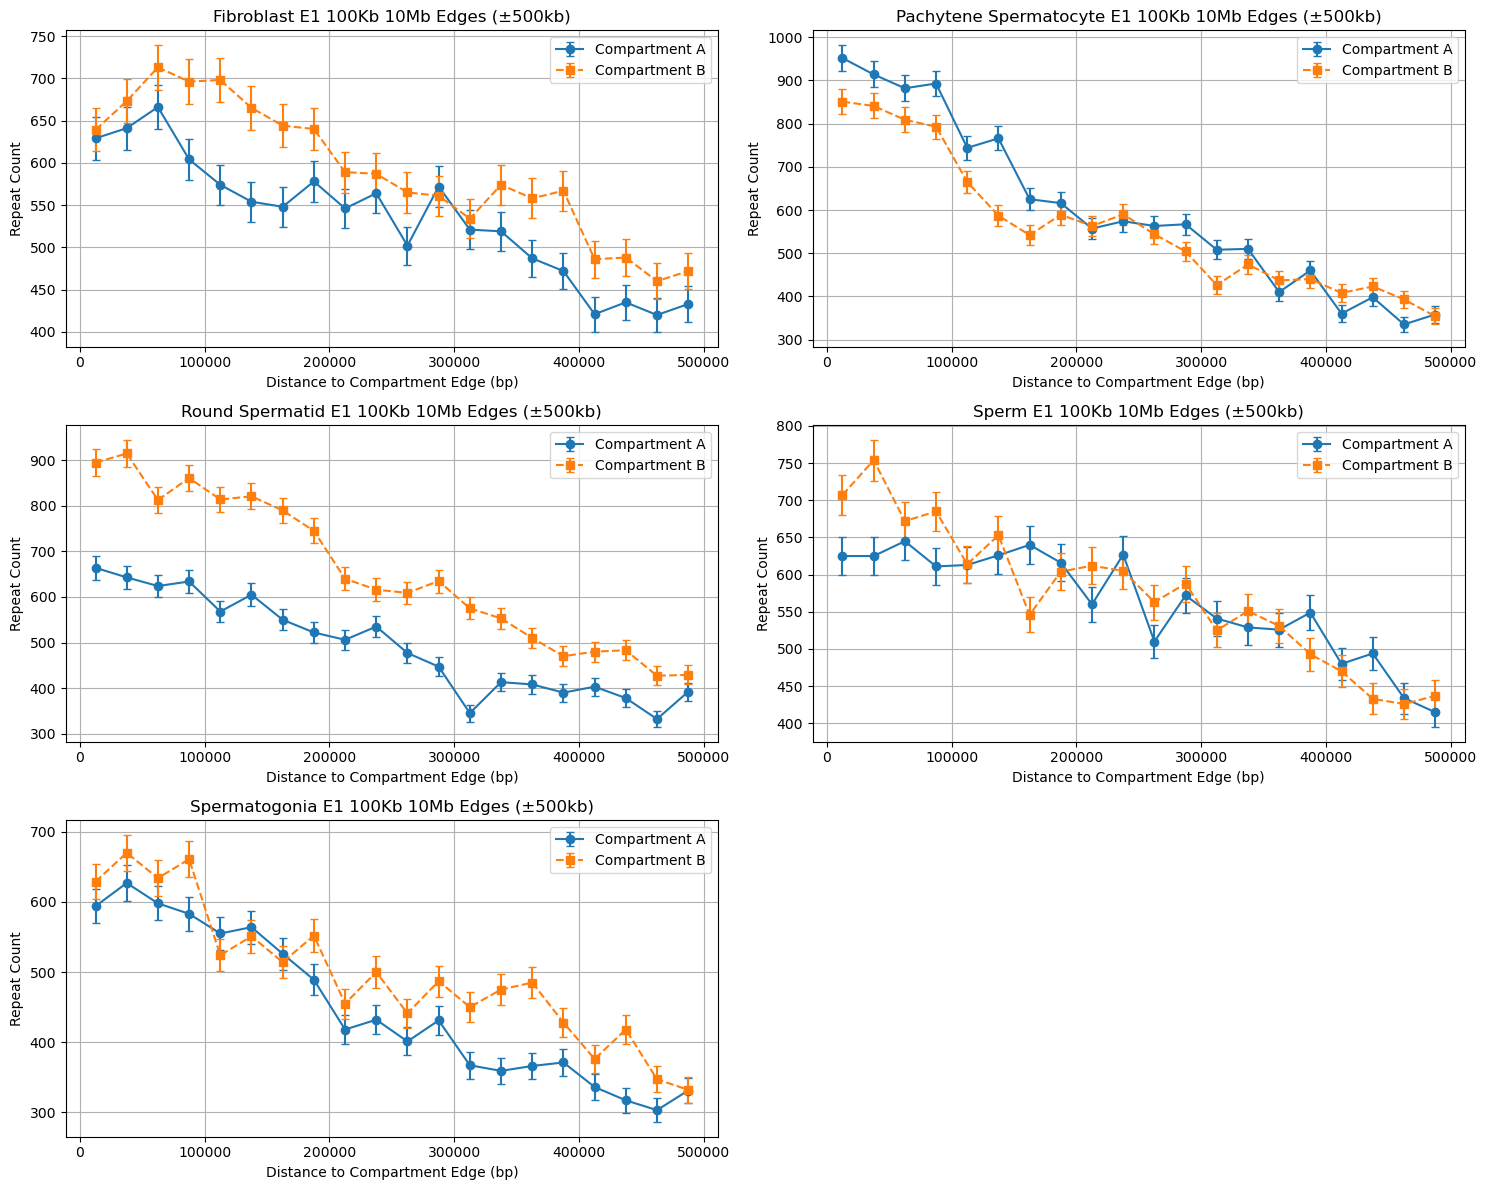

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# === Settings ===
num_bins = 20
max_dist = 500_000
bins = np.linspace(0, max_dist, num_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

def bin_absmid_with_error(absmid_values, bins):
    counts, _ = np.histogram(absmid_values, bins=bins)
    errors = np.sqrt(counts)
    return counts, errors

# === Generate sample names ===
sample_names = sorted(set(
    name.replace("_A_nested_remapped_500kb", "").replace("_B_nested_remapped_500kb", "")
    for name in remapped_names_500kb
))

# === Prepare subplot grid ===
num_samples = min(6, len(sample_names))  # limit to 6 for 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# === Plot ===
for i, sample in enumerate(sample_names[:num_samples]):
    a_name = f"{sample}_A_nested_remapped_500kb"
    b_name = f"{sample}_B_nested_remapped_500kb"

    if a_name in globals() and b_name in globals():
        df_A = globals()[a_name]
        df_B = globals()[b_name]

        absmid_A = df_A['absmid'].dropna()
        absmid_B = df_B['absmid'].dropna()

        counts_A, errors_A = bin_absmid_with_error(absmid_A, bins)
        counts_B, errors_B = bin_absmid_with_error(absmid_B, bins)

        ax = axes[i]
        ax.errorbar(bin_centers, counts_A, yerr=errors_A, marker='o', linestyle='-', capsize=3, label='Compartment A')
        ax.errorbar(bin_centers, counts_B, yerr=errors_B, marker='s', linestyle='--', capsize=3, label='Compartment B')
        ax.set_title(sample.replace("_", " ").title() + " (±500kb)")
        ax.set_xlabel('Distance to Compartment Edge (bp)')
        ax.set_ylabel('Repeat Count')
        ax.grid(True)
        ax.legend()

# === Hide unused subplots (if fewer than 6 samples) ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Lets do it correct this time 